In [1]:
# import libraries untuk data cleaning, manipulation and exploratory data analysis
import pandas as pd
import numpy as np

# import libraries untuk data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import libraries untuk uji statistik
from scipy.stats import shapiro # Uji Normalitas
from scipy.stats import kruskal  # Non Parametrik
from scipy.stats import chi2_contingency

# fungsi untuk menampilkan semua kolom DataFrame saat membaca datasetnya di output
pd.set_option('display.max_columns', None)

# fungsi untuk ignore warnings
import warnings
warnings.filterwarnings("ignore")

# **Latar Belakang**
Sebuah perusahaan yang bergerak di bidang retail multichannel menjual berbagai macam produk retail. Pendapatan perusahaan ini berasal dari pembelian masyarakat melalui channel website, catalog dan store secara offline. Perusahaan memiliki ribuan customer dengan beragam profil. (ID, Tahun Lahir, Pendidikan, Status Pernikahan, Pendapatan, Jumlah Anak Kecil, Jumlah Anak Remaja, Tanggal Mendaftar Mmembership, Jumlah Hari Sejak Pembelian Terakhir dan Data Komplain Pelanggan).


# **Pernyataan Masalah (Problem Statement)**

Perusahaan telah melakukan marketing dengan beberapa aktivitas pemasaran. Meskipun perusahaan telah menginvestasikan anggaran besar untuk kegiatan pemasaran, **respons pelanggan terhadap kampanye pemasaran masih rendah karena strategi pemasaran belum efektif dan efisien**, sehingga anggaran marketing belum optimal dan berpotensi menghambat pertumbuhan pendapatan, perlu strategi untuk meningkatkan efisiensi aktivitas pemasaran dengan *segmented marketing*.

Sebagai seorang *data analyst*, melalui analisis, berikut pertanyaan yg akan dijawab :
- Bagaimana segmentasi pelanggan berdasarkan analisis RFM?
- Bagaimana strategi kampanye pemasaran dapat dioptimalkan berdasarkan respons penerimaan terhadap campaign pada tiap segment?
- Bagaimana strategi pemasaran dengan promosi diskon berdasarkan respons pelanggan terhadap discount?
- Bagaimana karakteristik pelanggan yang memiliki total spending besar?

# **Output (Goals)**
- Menentukan segmentasi pelanggan dengan analisis RFM untuk memahami perilaku, nilai dan strategi perlakuan pelanggan.
- Mengoptimalkan strategi kampanye pemasaran untuk meningkatkan efektivitas dan efisiensi kampanye pemasaran.
- Mengoptimalkan strategi promosi diskon agar semakin banyak pelanggan bertransaksi.
- Mengidentifikasi karakteristik pelanggan bernilai tinggi berdasarkan total spending sebagai acuan akuisisi pelanggan baru.

# **Data Understanding**

Sebelum masuk ke dalam analisis, sangat perlu mengenal dataset terlebih dahulu dalam tahapan *data understanding*. Dari proses ini, akan mencari tahu anomali-anomali dalam dataset yang nantinya akan ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan penjelasan mengenai langkah *data cleaning* yang diambil.

## **Meta Data** :

### 1. People (Data Profil Pelanggan)

- ID: Customer's unique identifier (Identifikasi unik pelanggan)
- Year_Birth: Customer's birth year (Tahun kelahiran pelanggan)
- Education: Customer's education level (Tingkat pendidikan pelanggan)
- Marital_Status: Customer's marital status (Status pernikahan pelanggan)
- Income: Customer's yearly household income (Pendapatan rumah tangga tahunan pelanggan)
- Kidhome: Number of children in customer's household (Jumlah anak kecil dalam rumah tangga pelanggan)
- Teenhome: Number of teenagers in customer's household (Jumlah remaja dalam rumah tangga pelanggan)
- Dt_Customer: Date of customer's enrollment with the company (Tanggal pelanggan mulai bergabung dengan perusahaan)
- Recency: Number of days since customer's last purchase (Jumlah hari sejak pembelian terakhir pelanggan)
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise (1 jika pelanggan mengajukan keluhan dalam 2 tahun terakhir, 0 jika tidak)

### 2. Products (Pengeluaran Pelanggan pada Tiap Produk)
- MntWines: Amount spent on wine in last 2 years (Jumlah pengeluaran untuk produk wine dalam 2 tahun terakhir)
- MntFruits: Amount spent on fruits in last 2 years (Jumlah pengeluaran untuk produk buah dalam 2 tahun terakhir)
- MntMeatProducts: Amount spent on meat in last 2 years (Jumlah pengeluaran untuk produk daging dalam 2 tahun terakhir)
- MntFishProducts: Amount spent on fish in last 2 years (Jumlah pengeluaran untuk produk ikan dalam 2 tahun terakhir)
- MntSweetProducts: Amount spent on sweets in last 2 years (Jumlah pengeluaran untuk produk manisan dalam 2 tahun terakhir)
- MntGoldProds: Amount spent on gold in last 2 years (Jumlah pengeluaran untuk produk emas dalam 2 tahun terakhir)

### 3. Promotions (Data Promosi & Campaign)
- NumDealsPurchases: Number of purchases made with a discount (Jumlah pembelian yang dilakukan dengan diskon)
- AcceptedCmp1: 1 if customer accepted offer in 1st campaign, 0 otherwise (1 jika pelanggan menerima penawaran pada kampanye pertama, 0 jika tidak)
- AcceptedCmp2: 1 if customer accepted offer in 2nd campaign, 0 otherwise (1 jika pelanggan menerima penawaran pada kampanye kedua, 0 jika tidak)
- AcceptedCmp3: 1 if customer accepted offer in 3rd campaign, 0 otherwise (1 jika pelanggan menerima penawaran pada kampanye ketiga, 0 jika tidak)
- AcceptedCmp4: 1 if customer accepted offer in 4th campaign, 0 otherwise (1 jika pelanggan menerima penawaran pada kampanye keempat, 0 jika tidak)
- AcceptedCmp5: 1 if customer accepted offer in 5th campaign, 0 otherwise (1 jika pelanggan menerima penawaran pada kampanye kelima, 0 jika tidak)
- Response: 1 if customer accepted offer in last campaign, 0 otherwise (1 jika pelanggan menerima penawaran pada kampanye terakhir, 0 jika tidak)

### 4. Place (Data Channel Penjualan & Kunjungan Web)
- NumWebPurchases: Number of purchases made through company's website (Jumlah pembelian yang dilakukan melalui situs web perusahaan)
- NumCatalogPurchases: Number of purchases made using catalog (Jumlah pembelian yang dilakukan menggunakan katalog)
- NumStorePurchases: Number of purchases made directly in stores (Jumlah pembelian yang dilakukan langsung di toko)
- NumWebVisitsMonth: Number of visits to company's website in last month (Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir)

In [2]:
# read dataset 

df = pd.read_csv('Supermarket Customers.csv', delimiter='\t')

display(df.head()) # 5 kolom teratas
display(df.tail()) # 5 kolom terbawah

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [3]:
# cek informasi dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# cek missing values/null values dalam dataset

df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
# menghitung persentasi missing values/null values di tiap kolom dalam dataset

(df.isna().sum() / len(df)).round(4) * 100

ID                     0.00
Year_Birth             0.00
Education              0.00
Marital_Status         0.00
Income                 1.07
Kidhome                0.00
Teenhome               0.00
Dt_Customer            0.00
Recency                0.00
MntWines               0.00
MntFruits              0.00
MntMeatProducts        0.00
MntFishProducts        0.00
MntSweetProducts       0.00
MntGoldProds           0.00
NumDealsPurchases      0.00
NumWebPurchases        0.00
NumCatalogPurchases    0.00
NumStorePurchases      0.00
NumWebVisitsMonth      0.00
AcceptedCmp3           0.00
AcceptedCmp4           0.00
AcceptedCmp5           0.00
AcceptedCmp1           0.00
AcceptedCmp2           0.00
Complain               0.00
Z_CostContact          0.00
Z_Revenue              0.00
Response               0.00
dtype: float64

Dari ketiga observasi di atas:

- Terdapat total 27 kolom dan 2,240 baris data dalam dataset
- Pada kolom `Income` terdapat kurang dari 2240 non-null values yaitu sebanyak 2216 non-null values
- Pada pengecekan null/missing values, terdapat **24 null values** pada kolom `Income` dengan persentase missing values sebesar **1,07%**.
- `ID` adalah nomor unik customer.
- `Dt_Customer` adalah tanggal pelanggan bergabung membership perusahaan.

In [6]:
# cek jumlah baris yang duplikat

print(f"Jumlah baris duplikat: {df.duplicated().sum()}")

Jumlah baris duplikat: 0


Dari hasil pengecekan duplicate values, tidak ada data yg duplikat.

### *Pengecekan variabel categorical/kualitatif*

In [7]:
# Kolom categorical profil customer
categorical_columns_profile = ['Education', 'Marital_Status', 'Complain']

# Loop untuk menampilkan unique values dan value counts
for col in categorical_columns_profile:
    print(f"Column: {col}")
    print("\nUnique Values:")
    print(df[col].unique())
    print("\nValue Counts:")
    print(df[col].value_counts())
    print(f"Persentase(dalam %):\n{df[col].value_counts(normalize=True).round(5) * 100}")
    print(f"\n{'-'*20}")

Column: Education

Unique Values:
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']

Value Counts:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Persentase(dalam %):
Education
Graduation    50.313
PhD           21.696
Master        16.518
2n Cycle       9.062
Basic          2.411
Name: proportion, dtype: float64

--------------------
Column: Marital_Status

Unique Values:
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']

Value Counts:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
Persentase(dalam %):
Marital_Status
Married     38.571
Together    25.893
Single      21.429
Divorced    10.357
Widow        3.438
Alone        0.134
Absurd       0.089
YOLO         0.089
Name: proportion, dtype: float64

--------------------
Column: Complain

Unique Values:
[0 1]


Dari observasi data categorical di atas:

- Pada variabel `Education` terdapat 5 unique values(5 kategori), diantaranya : 'Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'.
- Setelah searching di internet, '2n cycle' dan 'Master' adalah 2 jenjang pendidikan yg sama sehingga bisa dijadikan 1 kategori "Master".
- Pada variabel `Education` terdapat kategori 'Basic' tidak jelas artinya sehingga akan dimasukkan ke dalam kategori baru yaitu Others.
- Kategori pada variabel `Education` terbanyak adalah 'Graduation'.
- Kategori 'Graduation' ambigu artinya sehingga akan diubah menjadi kategori tingkat pendidikan di bawah Master dan PhD yaitu 'Bachelor/Diploma'.
- Pada variabel `Marital_Status`, terdapat 8 unique values(8 kategori), diantaranya: Married (Menikah), Together (Pasangan Tinggal Bersama), Single (Belum Menikah), Divorced (Bercerai), Widow (Janda/Duda), Alone, Absurd, YOLO. 
- Kategori pada variabel `Marital_Status` terbanyak adalah 'Married'.
- Kategori 'Alone' sama dengan kategori 'Single', sehingga akan dijadikan 1 kategori. 
- Sementara kategori 'Absurd' dan 'YOLO' tidak jelas artinya sehingga akan dimasukkan ke dalam kategori baru yaitu 'Others'.

In [8]:
# Kolom categorical promosi
categorical_columns_promotions = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                      'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Looping untuk unique values dan value counts
for col in categorical_columns_promotions:
    print(f"Column: {col}")
    print("\nUnique Values:")
    print(df[col].unique())
    print("\nValue Counts:")
    print(df[col].value_counts())
    print(f"Persentase(dalam %):\n{df[col].value_counts(normalize=True).round(5) * 100}")
    print(f"\n{'-'*20}")

Column: AcceptedCmp1

Unique Values:
[0 1]

Value Counts:
AcceptedCmp1
0    2096
1     144
Name: count, dtype: int64
Persentase(dalam %):
AcceptedCmp1
0    93.571
1     6.429
Name: proportion, dtype: float64

--------------------
Column: AcceptedCmp2

Unique Values:
[0 1]

Value Counts:
AcceptedCmp2
0    2210
1      30
Name: count, dtype: int64
Persentase(dalam %):
AcceptedCmp2
0    98.661
1     1.339
Name: proportion, dtype: float64

--------------------
Column: AcceptedCmp3

Unique Values:
[0 1]

Value Counts:
AcceptedCmp3
0    2077
1     163
Name: count, dtype: int64
Persentase(dalam %):
AcceptedCmp3
0    92.723
1     7.277
Name: proportion, dtype: float64

--------------------
Column: AcceptedCmp4

Unique Values:
[0 1]

Value Counts:
AcceptedCmp4
0    2073
1     167
Name: count, dtype: int64
Persentase(dalam %):
AcceptedCmp4
0    92.545
1     7.455
Name: proportion, dtype: float64

--------------------
Column: AcceptedCmp5

Unique Values:
[0 1]

Value Counts:
AcceptedCmp5
0    2077

Dari observasi data categorical di atas:
- Persentase customer yg complain dalam 2 tahun terakhir adalah 0,938%, sebanyak 21 complain. Secara persentase tidak banyak customer yang melakukan complain.
- Persentase customer yg merespons tiap campaign lebih sedikit daripada yg menolak campaign. Sebagian besar pelanggan supermarket tidak merespons promosi.
- Nama kolom `Response` agak ambigu, maka akan diubah nama kolomnya menjadi AcceptedCmp6 sehingga bisa selaras dengan kolom AcceptCmp1-5.

### *Summary Statistics dari variabel numerical/kuantitatif*

In [9]:
numeric_cols = ['Year_Birth','Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

df[numeric_cols].describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,3.0,11.0
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.0,0.0
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0


Dari observasi setiap variabel di atas:
- Pada variabel `Year_Birth`, tahun kelahiran terkecil 1893. Tidak mungkin kelahiran 1893 masih hidup, ada kemungkinan kesalahan pada reporting, akan dicleaning.
- Agar dapat memberikan insight yang lebih baik, maka variabel `Year_Birth` akan diubah menjadi variabel `Age`.
- Pada variabel `Income`, income terkecil = 1730 USD, income rata-rata = 52247.251354 USD, income terbesar = 666666 USD. 
- Income terbesar 12 kali income rata-rata, terdapat extreme outliers pada kolom `Income`.
- Pada variabel `Kidhome` dan `Teenhome`, jumlah anak dan jumlah remaja maksimal = 2.
- Pada variabel `Recency`, rata-rata jumlah hari seberapa baru customer melakukan transaksi = 49 hari dan maksimal = 99 hari.
- Akan dibuat kolom `Total_Spending` dengan menjumlahkan total spending customer untuk semua produk.
- Rata-rata `NumDealsPurchases` (pembelian dengan diskon) = 2
- Rata-rata `NumWebPurchases` (pembelian melalui web perusahaan) = 4
- Rata-rata `NumCatalogPurchases` (pembelian melalui catalog) = 2
- Rata-rata `NumStorePurchases` (pembelian langsung di toko) = 5
- Rata-rata `NumWebVisitsMonth` (kunjungan customer ke web perusahaan) = 5
- Rata-rata Total Transaksi masih tergolong rendah.
- Kolom `Z_CostContact` dan `Z_Revenue` hanya punya 1 unique value saja, tidak memberikan insight apapun sehingga akan didrop.

# **Data Cleaning & Data Transformation**

- Mengubah nama kolom
- Mengubah urutan kolom
- Mengubah beberapa kategori dari categorical data
- Menambahkan kolom baru
- Menghapus kolom yang tidak dapat memberikan insight dan tidak digunakan dalam analisis
- Handle data inconsistency
- Handle missing values dan outliers

In [10]:
# membuat copy dari dataset sebelum cleaning agar menjaga data original tetap utuh dan jika ada kesalahan saat preprocessing bisa kembali ke data awal

df_clean = df.copy()

In [11]:
# rename nama kolom Response menjadi AcceptedCmp6 agar selaras dengan nama kolom promosi lainnya
# rename nama kolom Marital_Status menjadi MaritalStatus agar selaras dengan kolom spending customer lainnya

df_clean = df_clean.rename(columns={
    'Marital_Status': 'MaritalStatus',
    'Response': 'AcceptedCmp6',
})

## Variabel Categorical

### Drop kolom `Complain` dan `Dt_Customer` karena tidak digunakan dalam analisis :

In [12]:
# drop kolom Complain dan Dt_Customer

df_clean.drop(columns = ['Complain', 'Dt_Customer'], inplace=True)

df_clean.head()

,ID,Year_Birth,Education,MaritalStatus,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,AcceptedCmp6
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,3,11,0


### Mengubah kategori untuk variabel `Education`:

Dari tahapan data understanding dan eksplorasi data awal, ditemukan bahwa:
- Kategori '2n cycle' dan 'Master' adalah 2 jenjang pendidikan yg sama sehingga bisa dijadikan 1 kategori 'Master'.
- Kategori pada variabel `Education` terbanyak adalah 'Graduation'.
- Kategori 'Graduation' ambigu artinya sehingga akan diubah menjadi kategori jenjang lebih rendah dibanding Master dan Phd yaitu 'Bachelor/Diploma'.
- Pada variabel `Education` terdapat kategori 'Basic' tidak jelas artinya sehingga akan dimasukkan ke dalam kategori baru yaitu 'HighSchool'.

In [13]:
# Mengubah beberapa kategori dalam kolom Education

df_clean['Education'].replace({
    'Graduation': 'Bachelor/Diploma',
    '2n Cycle': 'Master', 
    'Basic': 'HighSchool'
}, inplace=True)

In [14]:
# cek unique value kolom Education untuk double check setelah cleaning

df_clean['Education'].unique()

array(['Bachelor/Diploma', 'PhD', 'Master', 'HighSchool'], dtype=object)

### Mengubah kategori untuk variabel `MaritalStatus`:

Dari tahapan data understanding dan eksplorasi data awal, ditemukan bahwa:
- Pada variabel `Marital_Status`, terdapat 8 unique values(8 kategori), diantaranya: Married (Menikah), Together (Pasangan Tinggal Bersama), Single (Belum Menikah), Divorced (Bercerai), Widow (Janda/Duda), Alone, Absurd, YOLO. 
- Kategori 'Alone' dalam konteks status pernikahan sama dengan kategori 'Single', sehingga akan dijadikan 1 kategori.
- Kategori 'Together' dalam konteks status pernikahan sama dengan kategori 'Married', sehingga akan dijadikan 1 kategori.
- Sementara kategori 'Absurd' dan 'YOLO' tidak jelas artinya sehingga akan dimasukkan ke dalam kategori baru yaitu 'Others'.

In [15]:
# Mengubah beberapa kategori dalam kolom Marital_tatus

df_clean['MaritalStatus'].replace({
    'Alone' : 'Single',
    'Absurd': 'Others', 
    'YOLO': 'Others'
}, inplace=True)

In [16]:
# cek unique value kolom MaritalStatus untuk double check

df_clean['MaritalStatus'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Others'],
      dtype=object)

### Handle *data inconsistency* pada variabel `MaritalStatus`:

In [17]:
df_clean[['MaritalStatus', 'Kidhome', 'Teenhome']]

,MaritalStatus,Kidhome,Teenhome
0,Single,0,0
1,Single,1,1
2,Together,0,0
3,Together,1,0
4,Married,1,0
...,...,...,...
2235,Married,0,1
2236,Together,2,1
2237,Divorced,0,0
2238,Together,0,1


Pada variabel `MaritalStatus` terdapat customer berstatus Single namun memiliki anak kecil dan/atau anak remaja sehingga akan dibuat kategori baru yaitu 'Single with Child'.

In [18]:
# Cek data customer dengan status Single yang memiliki anak kecil atau remaja 

single_with_children = df_clean[(df_clean['MaritalStatus'] == 'Single') & 
                                 ((df_clean['Kidhome'] > 0) | (df_clean['Teenhome'] > 0))]

print(f"Jumlah yang berstatus Single dengan anak: {len(single_with_children)}")
print(f"\nDetail data yang berstatus Single dengan anak:")
display(single_with_children[['MaritalStatus', 'Kidhome', 'Teenhome']])

Jumlah yang berstatus Single dengan anak: 316

Detail data yang berstatus Single dengan anak:


,MaritalStatus,Kidhome,Teenhome
1,Single,1,1
19,Single,1,0
27,Single,1,0
35,Single,1,1
48,Single,2,1
...,...,...,...
2201,Single,0,1
2205,Single,1,1
2224,Single,0,1
2227,Single,0,1


Terdapat 316 data yang tidak konsisten, customer berstatus Single tetapi memiliki anak kecil dam/atau remaja, hal in tidak masuk akal secara logika.

Kemungkinan penyebab inconsistency pada data kategori status Single:
- Kesalahan input (data entry error).
- Tidak mungkin Single belum menikah tetapi bisa saja Single karena tidak tinggal dengan pasangan atau ada perubahan status pernikahan, dulunya menikah tetapi sekarang single (cerai/duda/janda), hal ini sangat mungkin karena perusahaan Supermarket ini basenya di Amerika.

Oleh karena itu:
- Karena status customer tidak jelas dan untuk menghindari bias/asumsi berlebihan maka ketidakkonsistenan data tersebut akan ditangani dengan menambahkan kategori baru yaitu 'Single with Child', yaitu customer yang Single sudah pernah menikah atau punya anak untuk membedakan dengan kategori Single yang belum pernah menikah ataupun belum pernah punya anak.

### Menambahkan kategori status pernikahan baru yaitu 'Single with Children' pada variabel `MaritalStatus`

In [19]:
# ubah data type pada kolom Marital Status menjadi string agar bisa pakai fungsi .loc untuk menambahkan status kategori baru

df_clean['MaritalStatus'] = df_clean['MaritalStatus'].astype(str)

In [20]:
# ubah data customer dengan Marital Status 'Single' tetapi punya anak menjadi 'Single with Children'

df_clean.loc[
    (df_clean['MaritalStatus'] == 'Single') &
    ((df_clean['Kidhome'] > 0) | (df_clean['Teenhome'] > 0)),
    'MaritalStatus'
] = 'Single with Child'

In [21]:
# cek kembali Marital Status setelah di cleaning untuk double check

display(df_clean['MaritalStatus'].unique())

display(df_clean[df_clean['MaritalStatus'] == 'Single with Child'][['MaritalStatus', 'Kidhome', 'Teenhome']])

array(['Single', 'Single with Child', 'Together', 'Married', 'Divorced',
       'Widow', 'Others'], dtype=object)

,MaritalStatus,Kidhome,Teenhome
1,Single with Child,1,1
19,Single with Child,1,0
27,Single with Child,1,0
35,Single with Child,1,1
48,Single with Child,2,1
...,...,...,...
2201,Single with Child,0,1
2205,Single with Child,1,1
2224,Single with Child,0,1
2227,Single with Child,0,1


Setelah Cleaning: pada variabel `Marital_Status`, terdapat 7 unique values(7 kategori), diantaranya: Married (Menikah), Together (Pasangan Tinggal Bersama), Single (Belum Menikah), Divorced (Bercerai), Widow (Janda/Duda) dan Others.

In [22]:
df_clean['MaritalStatus'].unique()

array(['Single', 'Single with Child', 'Together', 'Married', 'Divorced',
       'Widow', 'Others'], dtype=object)

### Menambahkan kolom `AcceptedCampaign` untuk menambahkan variabel categorical yaitu customer yang paling tidak pernah menerima campaign sebanyak 1 kali dan yang tidak pernah menerima campaign sama sekali.

In [23]:
acc_campaign = df_clean['AcceptedCampaign'] = np.where(
    df_clean[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']].sum(axis=1) > 0,
    'Yes',
    'No'
)

df_clean.head()

,ID,Year_Birth,Education,MaritalStatus,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,AcceptedCmp6,AcceptedCampaign
0,5524,1957,Bachelor/Diploma,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,3,11,1,Yes
1,2174,1954,Bachelor/Diploma,Single with Child,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,3,11,0,No
2,4141,1965,Bachelor/Diploma,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,3,11,0,No
3,6182,1984,Bachelor/Diploma,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,3,11,0,No
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,3,11,0,No


In [24]:
# rearrange urutan kolom 

df_clean = df_clean[[# People 
    'ID', 'Year_Birth',  'Education', 'MaritalStatus', 'Income',
    'Kidhome', 'Teenhome', 'Recency',
    # Products
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds',
    # Promotion (dengan urutan AcceptedCmp1,2,dst)
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6', 'AcceptedCampaign', 'NumDealsPurchases',
    # Place
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
    'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']]

df_clean.head()

,ID,Year_Birth,Education,MaritalStatus,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
0,5524,1957,Bachelor/Diploma,Single,58138.0,0,0,58,635,88,546,172,88,88,0,0,0,0,0,1,Yes,3,8,10,4,7,3,11
1,2174,1954,Bachelor/Diploma,Single with Child,46344.0,1,1,38,11,1,6,2,1,6,0,0,0,0,0,0,No,2,1,1,2,5,3,11
2,4141,1965,Bachelor/Diploma,Together,71613.0,0,0,26,426,49,127,111,21,42,0,0,0,0,0,0,No,1,8,2,10,4,3,11
3,6182,1984,Bachelor/Diploma,Together,26646.0,1,0,26,11,4,20,10,3,5,0,0,0,0,0,0,No,2,2,0,4,6,3,11
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,0,0,0,0,0,0,No,5,5,3,6,5,3,11


## Variabel Numerical


### Drop kolom `Z_CostContact` dan `Z_Revenue` karena tidak memberikan insight apapun dan tidak digunakan dalam analisis :

In [25]:
df_clean.head()

,ID,Year_Birth,Education,MaritalStatus,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
0,5524,1957,Bachelor/Diploma,Single,58138.0,0,0,58,635,88,546,172,88,88,0,0,0,0,0,1,Yes,3,8,10,4,7,3,11
1,2174,1954,Bachelor/Diploma,Single with Child,46344.0,1,1,38,11,1,6,2,1,6,0,0,0,0,0,0,No,2,1,1,2,5,3,11
2,4141,1965,Bachelor/Diploma,Together,71613.0,0,0,26,426,49,127,111,21,42,0,0,0,0,0,0,No,1,8,2,10,4,3,11
3,6182,1984,Bachelor/Diploma,Together,26646.0,1,0,26,11,4,20,10,3,5,0,0,0,0,0,0,No,2,2,0,4,6,3,11
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,0,0,0,0,0,0,No,5,5,3,6,5,3,11


In [26]:
# drop kolom Z_CostContact, Z_Revenue

df_clean.drop(columns = ['Z_CostContact', 'Z_Revenue'], inplace=True)

df_clean

,ID,Year_Birth,Education,MaritalStatus,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Bachelor/Diploma,Single,58138.0,0,0,58,635,88,546,172,88,88,0,0,0,0,0,1,Yes,3,8,10,4,7
1,2174,1954,Bachelor/Diploma,Single with Child,46344.0,1,1,38,11,1,6,2,1,6,0,0,0,0,0,0,No,2,1,1,2,5
2,4141,1965,Bachelor/Diploma,Together,71613.0,0,0,26,426,49,127,111,21,42,0,0,0,0,0,0,No,1,8,2,10,4
3,6182,1984,Bachelor/Diploma,Together,26646.0,1,0,26,11,4,20,10,3,5,0,0,0,0,0,0,No,2,2,0,4,6
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,0,0,0,0,0,0,No,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor/Diploma,Married,61223.0,0,1,46,709,43,182,42,118,247,0,0,0,0,0,0,No,2,9,3,4,5
2236,4001,1946,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,1,0,0,0,0,0,Yes,7,8,2,5,7
2237,7270,1981,Bachelor/Diploma,Divorced,56981.0,0,0,91,908,48,217,32,12,24,0,0,0,1,0,0,Yes,1,2,3,13,6
2238,8235,1956,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,0,0,0,0,0,0,No,2,6,5,10,3


### Drop kolom `NumWebVisitsMonth` tidak digunakan dalam analisis :

In [27]:
# drop kolom Z_CostContact, Z_Revenue

df_clean.drop(columns = ['NumWebVisitsMonth'], inplace=True)

df_clean

,ID,Year_Birth,Education,MaritalStatus,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,5524,1957,Bachelor/Diploma,Single,58138.0,0,0,58,635,88,546,172,88,88,0,0,0,0,0,1,Yes,3,8,10,4
1,2174,1954,Bachelor/Diploma,Single with Child,46344.0,1,1,38,11,1,6,2,1,6,0,0,0,0,0,0,No,2,1,1,2
2,4141,1965,Bachelor/Diploma,Together,71613.0,0,0,26,426,49,127,111,21,42,0,0,0,0,0,0,No,1,8,2,10
3,6182,1984,Bachelor/Diploma,Together,26646.0,1,0,26,11,4,20,10,3,5,0,0,0,0,0,0,No,2,2,0,4
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,0,0,0,0,0,0,No,5,5,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor/Diploma,Married,61223.0,0,1,46,709,43,182,42,118,247,0,0,0,0,0,0,No,2,9,3,4
2236,4001,1946,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,1,0,0,0,0,0,Yes,7,8,2,5
2237,7270,1981,Bachelor/Diploma,Divorced,56981.0,0,0,91,908,48,217,32,12,24,0,0,0,1,0,0,Yes,1,2,3,13
2238,8235,1956,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,0,0,0,0,0,0,No,2,6,5,10


In [28]:
# rearrange urutan kolom 

df_clean = df_clean[[# People 
    'ID', 'Year_Birth',  'Education', 'MaritalStatus', 'Income',
    'Kidhome', 'Teenhome', 'Recency',
    # Products
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds',
    # Promotion (dengan urutan AcceptedCmp1,2,dst)
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6', 'AcceptedCampaign', 'NumDealsPurchases',
    # Place
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

df_clean.head()

,ID,Year_Birth,Education,MaritalStatus,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,5524,1957,Bachelor/Diploma,Single,58138.0,0,0,58,635,88,546,172,88,88,0,0,0,0,0,1,Yes,3,8,10,4
1,2174,1954,Bachelor/Diploma,Single with Child,46344.0,1,1,38,11,1,6,2,1,6,0,0,0,0,0,0,No,2,1,1,2
2,4141,1965,Bachelor/Diploma,Together,71613.0,0,0,26,426,49,127,111,21,42,0,0,0,0,0,0,No,1,8,2,10
3,6182,1984,Bachelor/Diploma,Together,26646.0,1,0,26,11,4,20,10,3,5,0,0,0,0,0,0,No,2,2,0,4
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,0,0,0,0,0,0,No,5,5,3,6


### Cleaning data pada variabel `Year_Birth` dengan mengubah `Year_Birth` menjadi `Age` dengan menambahkan kolom baru untuk mempermudah analisis dan drop kolom `Year_Birth` :

In [29]:
# Menambahkan kolom baru Age

df_clean["Age"] = 2025 - df_clean["Year_Birth"]

In [30]:
# Drop kolom Year_Birth

df_clean.drop(columns = 'Year_Birth', inplace=True)

df_clean

,ID,Education,MaritalStatus,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Age
0,5524,Bachelor/Diploma,Single,58138.0,0,0,58,635,88,546,172,88,88,0,0,0,0,0,1,Yes,3,8,10,4,68
1,2174,Bachelor/Diploma,Single with Child,46344.0,1,1,38,11,1,6,2,1,6,0,0,0,0,0,0,No,2,1,1,2,71
2,4141,Bachelor/Diploma,Together,71613.0,0,0,26,426,49,127,111,21,42,0,0,0,0,0,0,No,1,8,2,10,60
3,6182,Bachelor/Diploma,Together,26646.0,1,0,26,11,4,20,10,3,5,0,0,0,0,0,0,No,2,2,0,4,41
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,0,0,0,0,0,0,No,5,5,3,6,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Bachelor/Diploma,Married,61223.0,0,1,46,709,43,182,42,118,247,0,0,0,0,0,0,No,2,9,3,4,58
2236,4001,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,1,0,0,0,0,0,Yes,7,8,2,5,79
2237,7270,Bachelor/Diploma,Divorced,56981.0,0,0,91,908,48,217,32,12,24,0,0,0,1,0,0,Yes,1,2,3,13,44
2238,8235,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,0,0,0,0,0,0,No,2,6,5,10,69


In [31]:
# rearrange urutan kolom

df_clean = df_clean[[# People 
    'ID', 'Age',  'Education', 'MaritalStatus', 'Income',
    'Kidhome', 'Teenhome', 'Recency',
    # Products
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds',
    # Promotion (dengan urutan AcceptedCmp1,2,dst)
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6', 'AcceptedCampaign', 'NumDealsPurchases',
    # Place
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

df_clean.head()

,ID,Age,Education,MaritalStatus,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,5524,68,Bachelor/Diploma,Single,58138.0,0,0,58,635,88,546,172,88,88,0,0,0,0,0,1,Yes,3,8,10,4
1,2174,71,Bachelor/Diploma,Single with Child,46344.0,1,1,38,11,1,6,2,1,6,0,0,0,0,0,0,No,2,1,1,2
2,4141,60,Bachelor/Diploma,Together,71613.0,0,0,26,426,49,127,111,21,42,0,0,0,0,0,0,No,1,8,2,10
3,6182,41,Bachelor/Diploma,Together,26646.0,1,0,26,11,4,20,10,3,5,0,0,0,0,0,0,No,2,2,0,4
4,5324,44,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,0,0,0,0,0,0,No,5,5,3,6


Cek outliers di variabel `Age` dan handle outliersnya :

In [32]:
# cek outliers dengan uji normalitas

shapiro(df_clean["Age"])[1] < 0.05

np.True_

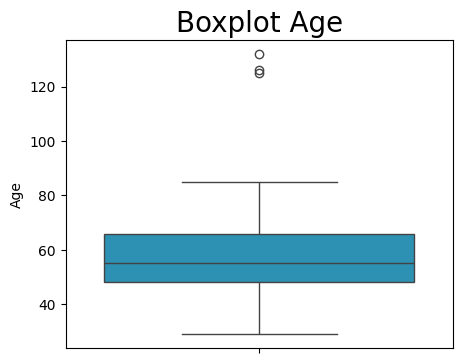

In [33]:
# cek distribusi data dan outliers dengan boxplot di kolom Age

plt.figure(figsize = (5,4))   
sns.boxplot(df_clean["Age"], color="#179cc9")
plt.title("Boxplot Age", size = 20)
plt.show()

In [34]:
# Jumlah outliers mild pada kolom Age

q1 = df_clean["Age"].quantile(0.25)
q2 = df_clean["Age"].quantile(0.5)
q3 = df_clean["Age"].quantile(0.75)

display(q1, q2, q3)

iqr = q3 - q1

lower_age = q1 - 1.5 * iqr
upper_age = q3 + 1.5 * iqr

outlier_age = df_clean[df_clean["Age"] > upper_age].shape[0]
print(f"Jumlah outliers : {outlier_age}")
print(f"Persentase outliers(%) : {round(outlier_age / df_clean.shape[0], 4)}")

np.float64(48.0)

np.float64(55.0)

np.float64(66.0)

Jumlah outliers : 3
Persentase outliers(%) : 0.0013


Dari uji normalitas shapiro dan boxplot, ditemukan bahwa ada outliers pada variabel `Age`. Terdapat 3 data outliers (0,0013%) yang usianya lebih dari 120 tahun. Hal ini kemungkinan karena ada kesalahan pada reportingnya. Usia > 100 tahun sangat kecil kemungkinannya untuk masih hidup sehingga akan dihapus.

Selanjutnya akan handle outliers tersebut:

In [35]:
# Handle outliers dengan hapus data customer dengan usia > 100 tahun karena sangat kecil kemungkinan untuk masih hidup

df_clean = df_clean.drop(index=df_clean[df_clean['Age'] > 100].index)

df_clean.head()

,ID,Age,Education,MaritalStatus,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,5524,68,Bachelor/Diploma,Single,58138.0,0,0,58,635,88,546,172,88,88,0,0,0,0,0,1,Yes,3,8,10,4
1,2174,71,Bachelor/Diploma,Single with Child,46344.0,1,1,38,11,1,6,2,1,6,0,0,0,0,0,0,No,2,1,1,2
2,4141,60,Bachelor/Diploma,Together,71613.0,0,0,26,426,49,127,111,21,42,0,0,0,0,0,0,No,1,8,2,10
3,6182,41,Bachelor/Diploma,Together,26646.0,1,0,26,11,4,20,10,3,5,0,0,0,0,0,0,No,2,2,0,4
4,5324,44,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,0,0,0,0,0,0,No,5,5,3,6


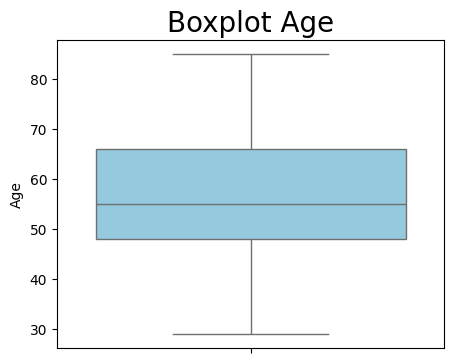

In [36]:
# Cek kembali outliers setelah cleaning untuk double check

plt.figure(figsize = (5,4))   
sns.boxplot(df_clean["Age"], color = 'skyblue')
plt.title("Boxplot Age", size = 20)
plt.show()

Membuat kategori customer berdasarkan usia dengan membuat variabel baru `AgeCategory` :

🌍 Menurut WHO (World Health Organization):

- Adult / Dewasa	                : 25 – 44 tahun
- Middle-aged / Paruh baya        : 45 – 59 tahun
- Older adult / Dewasa lanjut     : 60 – 74 tahun
- Elderly / Lansia                : 75 – 84 tahun	
- Oldest old / Lanjut usia lanjut : 85+ tahun

In [37]:
# Membuat kolom baru AgeCategory

def age_category(age):
    if 29 <= age <= 44 :
        return 'Adult/Dewasa (29-44)'
    elif 45 <= age <= 59 :
        return 'Middle-age/Paruh baya (45-59)'
    else:
        return 'Elderly/Lansia (60+)'

# Tambahkan ke dataframe
df_clean.insert(2, 'AgeCategory', df_clean['Age'].apply(age_category))

In [38]:
df_clean.head()

,ID,Age,AgeCategory,Education,MaritalStatus,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,5524,68,Elderly/Lansia (60+),Bachelor/Diploma,Single,58138.0,0,0,58,635,88,546,172,88,88,0,0,0,0,0,1,Yes,3,8,10,4
1,2174,71,Elderly/Lansia (60+),Bachelor/Diploma,Single with Child,46344.0,1,1,38,11,1,6,2,1,6,0,0,0,0,0,0,No,2,1,1,2
2,4141,60,Elderly/Lansia (60+),Bachelor/Diploma,Together,71613.0,0,0,26,426,49,127,111,21,42,0,0,0,0,0,0,No,1,8,2,10
3,6182,41,Adult/Dewasa (29-44),Bachelor/Diploma,Together,26646.0,1,0,26,11,4,20,10,3,5,0,0,0,0,0,0,No,2,2,0,4
4,5324,44,Adult/Dewasa (29-44),PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,0,0,0,0,0,0,No,5,5,3,6


### Handle Outliers dan Missing Values pada variabel `Income` :


#### 1. Handle Outliers pada variabel `Income`

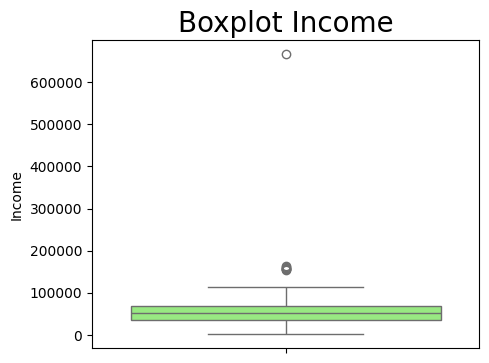

In [39]:
# Cek outliers pada variabel Income

plt.figure(figsize = (5,4))   
sns.boxplot(df_clean["Income"], color = "#8ff971")
plt.title("Boxplot Income", size = 20)
plt.show()

Dari boxplot, terdapat outliers mild dan outliers extreme pada variabel `Income`.

In [40]:
# Nilai min dan max pada kolom Income sebelum handling outliers

display(df_clean['Income'].min())
display(df_clean['Income'].max())

np.float64(1730.0)

np.float64(666666.0)

Selanjutnya akan hitung jumlah outliers mild dan outliers extremenya :

In [41]:
# Jumlah outliers mild pada kolom Income

q1 = df_clean["Income"].quantile(0.25)
q2 = df_clean["Income"].quantile(0.5)
q3 = df_clean["Income"].quantile(0.75)

display(q1, q2, q3)

iqr = q3 - q1

lower_income = q1 - 1.5 * iqr
upper_income = q3 + 1.5 * iqr

outlier_income = df_clean[(df_clean["Income"] < lower_income) | (df_clean["Income"] > upper_income)].shape[0]
print(f"Jumlah outliers : {outlier_income}")
print(f"Persentase outliers(%) : {round(outlier_income / df_clean.shape[0], 4)}")

np.float64(35246.0)

np.float64(51373.0)

np.float64(68487.0)

Jumlah outliers : 8
Persentase outliers(%) : 0.0036


In [42]:
# Jumlah Extreme Outliers pada kolom Income

q1 = df_clean["Income"].quantile(0.25)
q2 = df_clean["Income"].quantile(0.5)
q3 = df_clean["Income"].quantile(0.75)

iqr = q3 - q1

lower_extreme_income = q1 - 3 * iqr
upper_extreme_income = q3 + 3 * iqr

outlier_extreme_income = df_clean[(df_clean["Income"] < lower_extreme_income) | (df_clean["Income"] > upper_extreme_income)].shape[0]
print(f"Jumlah outliers extreme: {outlier_extreme_income}")
print(f"Persentase outliers(%) : {round(outlier_extreme_income / df_clean.shape[0], 4)}")

Jumlah outliers extreme: 1
Persentase outliers(%) : 0.0004


In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Age                  2237 non-null   int64  
 2   AgeCategory          2237 non-null   object 
 3   Education            2237 non-null   object 
 4   MaritalStatus        2237 non-null   object 
 5   Income               2213 non-null   float64
 6   Kidhome              2237 non-null   int64  
 7   Teenhome             2237 non-null   int64  
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  AcceptedCmp1         2237 non-null   int64 

Hapus extreme outlier:

In [44]:
# Hapus extreme outlier

index_extreme_income = df_clean['Income'].idxmax()
df_clean = df_clean.drop(index_extreme_income)

# Cek hasilnya setelah handling outliers Income
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2236 non-null   int64  
 1   Age                  2236 non-null   int64  
 2   AgeCategory          2236 non-null   object 
 3   Education            2236 non-null   object 
 4   MaritalStatus        2236 non-null   object 
 5   Income               2212 non-null   float64
 6   Kidhome              2236 non-null   int64  
 7   Teenhome             2236 non-null   int64  
 8   Recency              2236 non-null   int64  
 9   MntWines             2236 non-null   int64  
 10  MntFruits            2236 non-null   int64  
 11  MntMeatProducts      2236 non-null   int64  
 12  MntFishProducts      2236 non-null   int64  
 13  MntSweetProducts     2236 non-null   int64  
 14  MntGoldProds         2236 non-null   int64  
 15  AcceptedCmp1         2236 non-null   int64 

In [45]:
# Table outliers mild (Conditional Selecting data outliers mild)

outliers_income = df_clean[(df_clean["Income"] > upper_income)]

outliers_income['Income'].sort_values().reset_index()

,index,Income
0,655,153924.0
1,2132,156924.0
2,1653,157146.0
3,164,157243.0
4,1300,157733.0
5,687,160803.0
6,617,162397.0


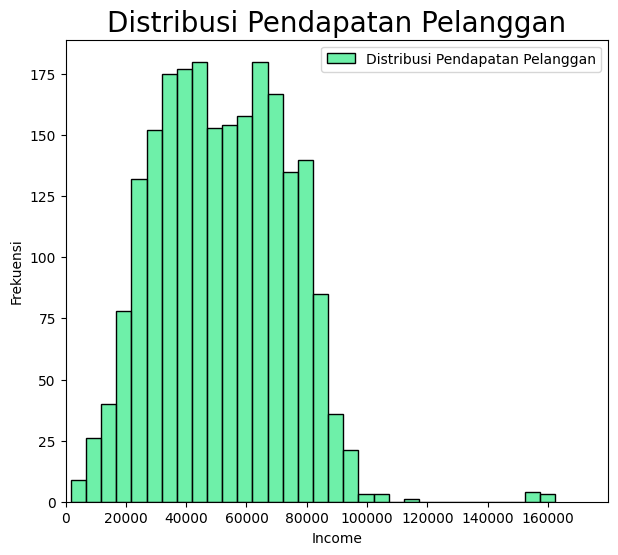

In [46]:
# Distribusi data Income customer

plt.figure(figsize=(7,6))
sns.histplot(df_clean['Income'], 
             color='#3eeb8c', label = 'Distribusi Pendapatan Pelanggan')
plt.title('Distribusi Pendapatan Pelanggan', size=20)
plt.xlabel('Income')
plt.ylabel('Frekuensi')

# Atur batas dan interval sumbu X
plt.xlim(0, 180000) # batas sumbu x
plt.xticks(range(0, 180000, 20000))  # interval sumbu x

plt.legend()
plt.show()

Berdasarkan table outliers mild dan distribusi data variabel `Income` pada histogram di atas, data outliers mild masih masuk akal sehingga pada analisis ini tidak didrop atau dihapus.

#### 2. Handle Missing Values pada variabel `Income`

Cara penanganan missing values pada kolom Income, ada 2 pertimbangan:
1. Imputasi menggunakan Median: jika persentase missing value relatif kecil (<5%), jika terdapat outliers lebih baik imputasi menggunakan Median
2. Drop/delete: jika persentase missing value besar (>5%) karena terlalu banyak missing values

Dari tahap data understanding dan eksplorasi data awal, ditemukan bahwa missing values pada kolom `Income` sebesar 1,07%. Oleh karena itu, missing values pada income akan diimputasi dengan nilai Median dari Income per masing-masing kategori `Education`.

In [47]:
# Membuat median Income per Education

median_income_edu = df_clean[['Income', 'Education']].groupby('Education').median().reset_index()

display(median_income_edu)

median_income_edu_dict = median_income_edu.set_index('Education')['Income'].to_dict()

,Education,Income
0,Bachelor/Diploma,51983.0
1,HighSchool,20744.0
2,Master,49605.0
3,PhD,55185.0


In [48]:
# Imputasi Income dengan Median Income berdasarkan Education untuk filling missing values

def fill_values_income(row):
    if pd.isna(row['Income']):
        return median_income_edu_dict[row['Education']]
    return row['Income']

df_clean['Income'] = df_clean.apply(fill_values_income, axis=1)

In [49]:
# cek missing values setelah imputasi median untuk double check

df_clean.isna().sum()

ID                     0
Age                    0
AgeCategory            0
Education              0
MaritalStatus          0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp6           0
AcceptedCampaign       0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
dtype: int64

Selanjutnya, membuat variabel baru `IncomeCategory` yaitu kategori customer berdasarkan `Income` :

In [50]:
min_income = df_clean["Income"].min()
q1 = df_clean["Income"].quantile(0.25)
q2 = df_clean["Income"].quantile(0.50)
q3 = df_clean["Income"].quantile(0.75)
max_income = df_clean["Income"].max()

display(min_income)
display(q1)
display(q2)
display(q3)
display(max_income)

np.float64(1730.0)

np.float64(35502.5)

np.float64(51445.5)

np.float64(68275.75)

np.float64(162397.0)

In [51]:
# Membuat kolom baru IncomeCategory

def income_category(income):
    if 0 <= income <= 50000 :
        return '<50K'
    elif 50000 < income <= 70000 :
        return '50K-70K'
    else:
        return '>70K'

# Tambahkan ke dataframe
df_clean.insert(6, 'IncomeCategory', df_clean['Income'].apply(income_category))

In [52]:
# cek kembali unique valuesnya untuk double check

df_clean['IncomeCategory'].unique()

array(['50K-70K', '<50K', '>70K'], dtype=object)

### Handle outliers pada variabel `Recency`

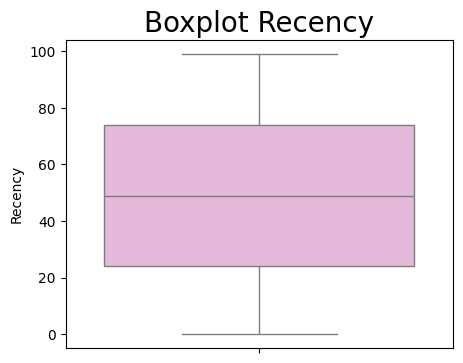

In [53]:
# cek distribusi data dan outliers dengan boxplot pada variabel Recency

plt.figure(figsize = (5,4))   
sns.boxplot(df_clean["Recency"], color="#ebb2dd")
plt.title("Boxplot Recency", size = 20)
plt.show()

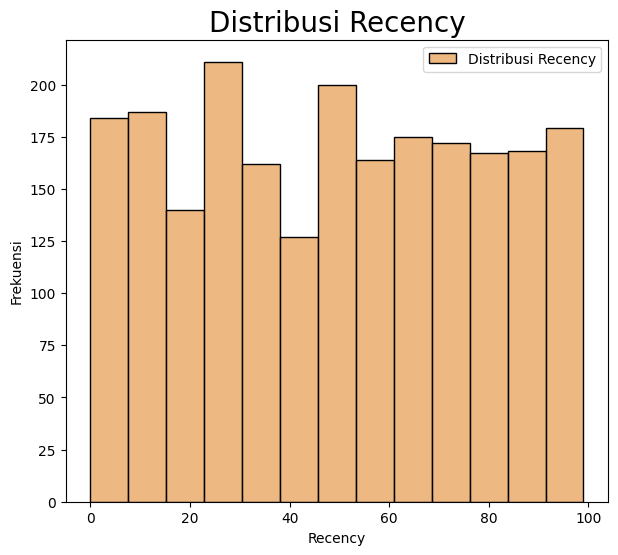

In [54]:
plt.figure(figsize=(7,6))
sns.histplot(df_clean['Recency'], 
             color="#e8a057", label = 'Distribusi Recency')
plt.title('Distribusi Recency', size=20)
plt.xlabel('Recency')
plt.ylabel('Frekuensi')

# # Atur batas dan interval sumbu X
# plt.xlim(0, 180000) # batas sumbu x
# plt.xticks(range(0, 180000, 20000))  # interval sumbu x

plt.legend()
plt.show()

Berdasarkan boxplot dan historgram di atas, tidak ada data outliers pada variabel `Recency` dan berdistribusi uniform sehingga dapat langsung digunakan untuk analisis.

### Membuat variabel baru `TotalSpending` untuk menghitung Total Spending Customer pada semua produk.

In [55]:
# Menambahkan variabel Total Spending

df_clean['TotalSpending'] = df_clean['MntWines'] + df_clean['MntFruits'] + df_clean['MntMeatProducts'] + df_clean['MntFishProducts'] + df_clean['MntSweetProducts'] + df_clean['MntGoldProds']

df_clean.head()

,ID,Age,AgeCategory,Education,MaritalStatus,Income,IncomeCategory,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalSpending
0,5524,68,Elderly/Lansia (60+),Bachelor/Diploma,Single,58138.0,50K-70K,0,0,58,635,88,546,172,88,88,0,0,0,0,0,1,Yes,3,8,10,4,1617
1,2174,71,Elderly/Lansia (60+),Bachelor/Diploma,Single with Child,46344.0,<50K,1,1,38,11,1,6,2,1,6,0,0,0,0,0,0,No,2,1,1,2,27
2,4141,60,Elderly/Lansia (60+),Bachelor/Diploma,Together,71613.0,>70K,0,0,26,426,49,127,111,21,42,0,0,0,0,0,0,No,1,8,2,10,776
3,6182,41,Adult/Dewasa (29-44),Bachelor/Diploma,Together,26646.0,<50K,1,0,26,11,4,20,10,3,5,0,0,0,0,0,0,No,2,2,0,4,53
4,5324,44,Adult/Dewasa (29-44),PhD,Married,58293.0,50K-70K,1,0,94,173,43,118,46,27,15,0,0,0,0,0,0,No,5,5,3,6,422


In [56]:
# rearrange urutan kolom dalam dataset agar lebih rapi

df_clean = df_clean[[# People 
    'ID', 'Age', 'AgeCategory', 'Education', 'MaritalStatus', 'Income', 'IncomeCategory',
    'Kidhome', 'Teenhome', 'Recency',
    # Products
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds', 'TotalSpending',
    # Promotion (dengan urutan AcceptedCmp1,2,dst)
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6', 'AcceptedCampaign', 'NumDealsPurchases', 
    # Place
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

df_clean.head()

,ID,Age,AgeCategory,Education,MaritalStatus,Income,IncomeCategory,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalSpending,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,5524,68,Elderly/Lansia (60+),Bachelor/Diploma,Single,58138.0,50K-70K,0,0,58,635,88,546,172,88,88,1617,0,0,0,0,0,1,Yes,3,8,10,4
1,2174,71,Elderly/Lansia (60+),Bachelor/Diploma,Single with Child,46344.0,<50K,1,1,38,11,1,6,2,1,6,27,0,0,0,0,0,0,No,2,1,1,2
2,4141,60,Elderly/Lansia (60+),Bachelor/Diploma,Together,71613.0,>70K,0,0,26,426,49,127,111,21,42,776,0,0,0,0,0,0,No,1,8,2,10
3,6182,41,Adult/Dewasa (29-44),Bachelor/Diploma,Together,26646.0,<50K,1,0,26,11,4,20,10,3,5,53,0,0,0,0,0,0,No,2,2,0,4
4,5324,44,Adult/Dewasa (29-44),PhD,Married,58293.0,50K-70K,1,0,94,173,43,118,46,27,15,422,0,0,0,0,0,0,No,5,5,3,6


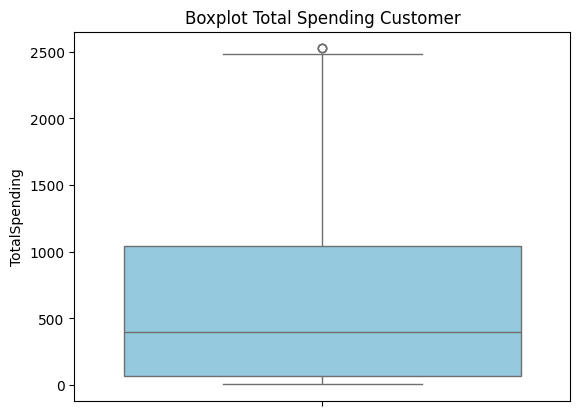

In [57]:
# cek outliers kolom Total Spending

plt.figsize=(5,4)
sns.boxplot(df_clean['TotalSpending'], color="skyblue")
plt.title('Boxplot Total Spending Customer')
plt.xticks(rotation=90)
plt.show()

In [58]:
# Jumlah outliers pada kolom Total Spending

q1 = df_clean['TotalSpending'].quantile(0.25)
q2 = df_clean['TotalSpending'].quantile(0.5)
q3 = df_clean['TotalSpending'].quantile(0.75)

iqr = q3 - q1

lower_spending = q1 - 1.5 * iqr
upper_spending = q3 + 1.5 * iqr

outlier_spending = df_clean[(df_clean['TotalSpending'] < lower_spending) | (df_clean['TotalSpending'] > upper_spending)].shape[0]
print(f'Jumlah outliers : {outlier_spending}')
print(f'Persentase outliers(%) : {round(outlier_spending / df_clean.shape[0], 4)}')

Jumlah outliers : 3
Persentase outliers(%) : 0.0013


In [59]:
# Conditional Selecting data outliers

df_clean_outliers = df_clean[(df_clean['TotalSpending'] > upper_spending)]

df_clean_outliers['TotalSpending'].sort_values().reset_index()

,index,TotalSpending
0,1492,2524
1,1179,2525
2,1572,2525


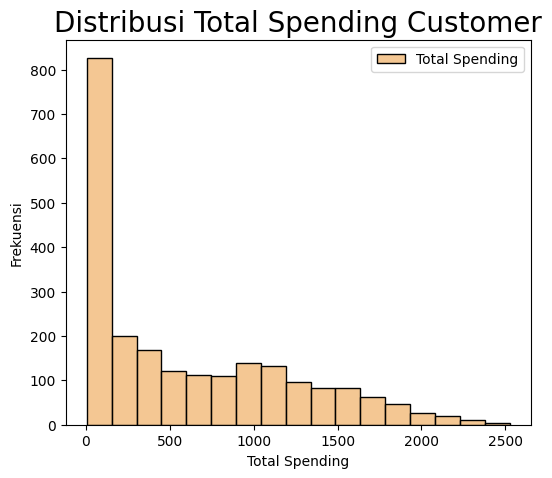

In [60]:
# Distribusi data Total Spending customer

plt.figure(figsize=(6,5))
sns.histplot(df_clean["TotalSpending"], color="#f1b56f", label="Total Spending")
plt.title("Distribusi Total Spending Customer", size=20)
plt.xlabel("Total Spending")
plt.ylabel("Frekuensi")

plt.legend()
plt.show()

Data outliers pada `TotalSpending` masih masuk akal sehingga pada analisis ini tidak didrop atau dihapus.

### Handling Outliers pada variabel `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`.

#### Boxplot untuk cek outliers semua variabel

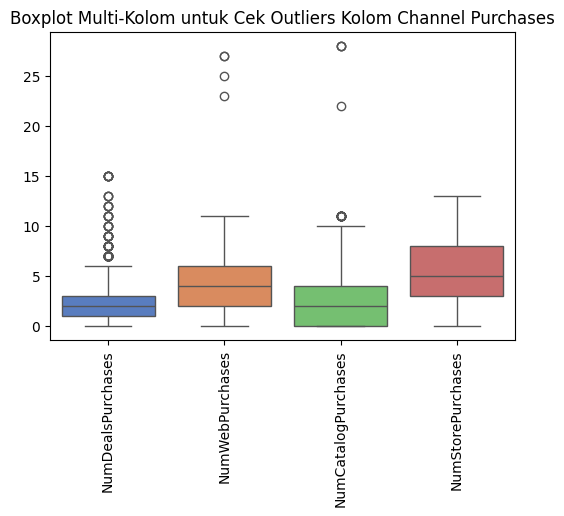

In [61]:
transactions = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

plt.figure(figsize=(6,4))
sns.boxplot(df_clean[transactions], palette = 'muted')
plt.title('Boxplot Multi-Kolom untuk Cek Outliers Kolom Channel Purchases')
plt.xticks(rotation=90)
plt.show()

Dari Boxplot, terdapat outliers pada `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases` dan `NumWebVisitsMonth`. Sementara `NumStorePurchases` tidak ada outliers sehingga bisa langsung digunakan untuk analisis.

#### Handling Outliers pada `NumDealsPurchases`

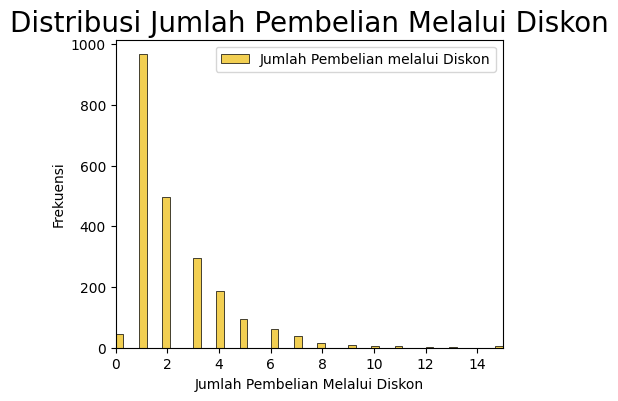

In [62]:
# Distribusi data NumDealsPurchases

plt.figure(figsize=(5,4))
sns.histplot(df_clean["NumDealsPurchases"], color="#eec018", label="Jumlah Pembelian melalui Diskon")
plt.title("Distribusi Jumlah Pembelian Melalui Diskon", size=20)
plt.xlabel("Jumlah Pembelian Melalui Diskon")
plt.ylabel("Frekuensi")

# Atur batas dan interval sumbu X
plt.xlim(0, 15) # batas sumbu x
plt.xticks(range(0, 16, 2))  # interval sumbu x
plt.legend()
plt.show()

Dari distribusi data di atas, data outliers pada `NumDealsPurchases` masih masuk akal sehingga pada analisis ini tidak didrop atau dihapus.

#### Handling Outliers pada `NumWebPurchases`

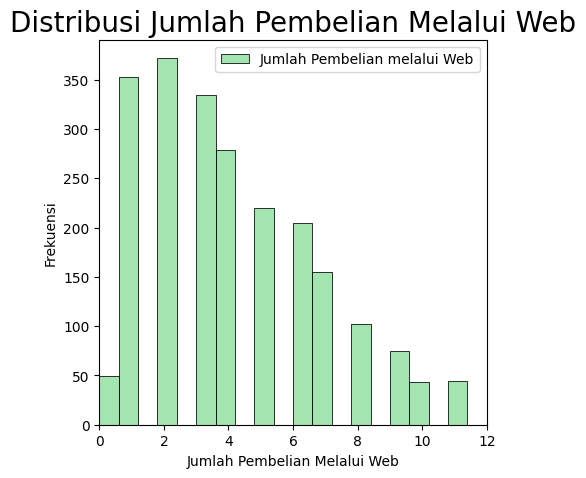

In [63]:
# Distribusi data NumWebPurchases

plt.figure(figsize=(5,5))
sns.histplot(df_clean['NumWebPurchases'], color="#85DD96", label='Jumlah Pembelian melalui Web')
plt.title('Distribusi Jumlah Pembelian Melalui Web', size=20)
plt.xlabel('Jumlah Pembelian Melalui Web')
plt.ylabel('Frekuensi')

# Atur batas dan interval sumbu X
plt.xlim(0, 12) # batas sumbu x
plt.xticks(range(0, 13, 2))  # interval sumbu x

plt.legend()
plt.show()

Dari distribusi data di atas, data outliers pada `NumWebPurchases` masih masuk akal sehingga pada analisis ini tidak didrop atau dihapus.

### Handling Outliers pada `NumCatalogPurchases`

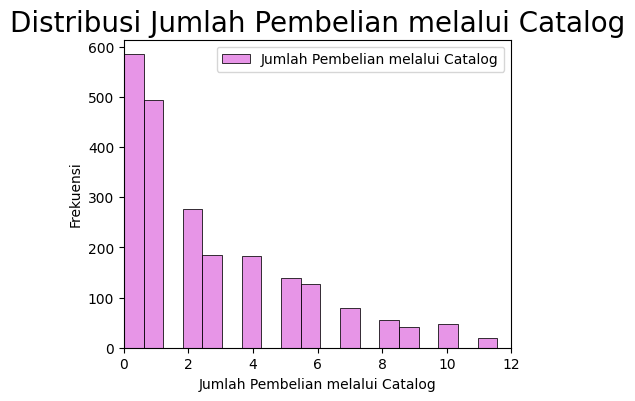

In [64]:
# Distribusi data NumCatalogPurchases

plt.figure(figsize=(5,4))
sns.histplot(df_clean['NumCatalogPurchases'], color='#e072e0', label='Jumlah Pembelian melalui Catalog')
plt.title('Distribusi Jumlah Pembelian melalui Catalog', size=20)
plt.xlabel('Jumlah Pembelian melalui Catalog')
plt.ylabel('Frekuensi')

# Atur batas dan interval sumbu X
plt.xlim(0, 12) # batas sumbu x
plt.xticks(range(0, 13, 2))  # interval sumbu x

plt.legend()
plt.show()

Dari distribusi data di atas, data outliers pada `NumCatalogPurchases` masih masuk akal sehingga pada analisis ini tidak didrop atau dihapus.

### Menambahkan variabel `TotalTransactions` untuk total jumlah transaksi customer.

In [65]:
df_clean['TotalTransactions'] = df_clean['NumDealsPurchases'] + df_clean['NumWebPurchases'] + df_clean['NumCatalogPurchases'] + df_clean['NumStorePurchases']

df_clean.head()

,ID,Age,AgeCategory,Education,MaritalStatus,Income,IncomeCategory,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalSpending,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalTransactions
0,5524,68,Elderly/Lansia (60+),Bachelor/Diploma,Single,58138.0,50K-70K,0,0,58,635,88,546,172,88,88,1617,0,0,0,0,0,1,Yes,3,8,10,4,25
1,2174,71,Elderly/Lansia (60+),Bachelor/Diploma,Single with Child,46344.0,<50K,1,1,38,11,1,6,2,1,6,27,0,0,0,0,0,0,No,2,1,1,2,6
2,4141,60,Elderly/Lansia (60+),Bachelor/Diploma,Together,71613.0,>70K,0,0,26,426,49,127,111,21,42,776,0,0,0,0,0,0,No,1,8,2,10,21
3,6182,41,Adult/Dewasa (29-44),Bachelor/Diploma,Together,26646.0,<50K,1,0,26,11,4,20,10,3,5,53,0,0,0,0,0,0,No,2,2,0,4,8
4,5324,44,Adult/Dewasa (29-44),PhD,Married,58293.0,50K-70K,1,0,94,173,43,118,46,27,15,422,0,0,0,0,0,0,No,5,5,3,6,19


#### Handle outliers pada variabel `TotalTransactions`

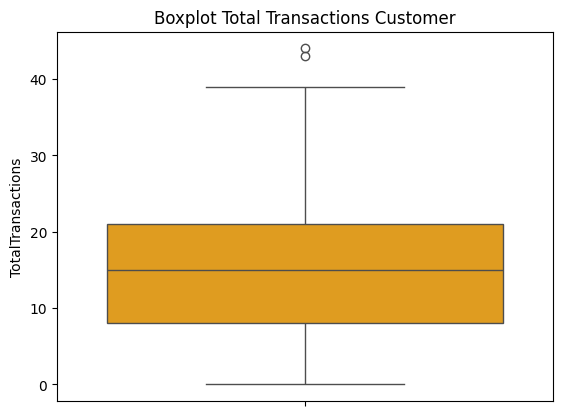

In [66]:
# cek outliers kolom Total Spending

plt.figsize=(5,4)
sns.boxplot(df_clean['TotalTransactions'], color="orange")
plt.title('Boxplot Total Transactions Customer')
plt.xticks(rotation=90)
plt.show()

Dari boxplot di atas, tidak terdapat outliers pada variabel `TotalChannelTransactions`.

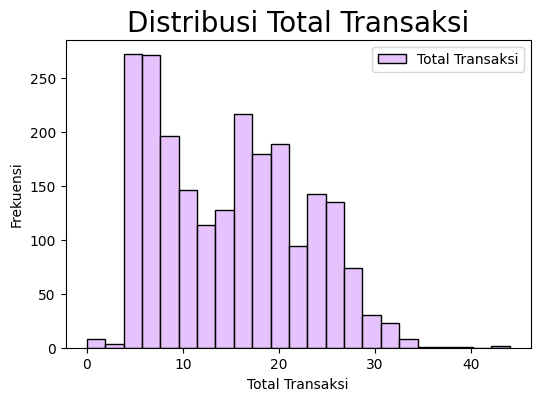

In [67]:
# Distribusi data TotalTransactions

plt.figure(figsize=(6,4))
sns.histplot(df_clean['TotalTransactions'], color="#deaffb", label='Total Transaksi')
plt.title('Distribusi Total Transaksi', size=20)
plt.xlabel('Total Transaksi')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

Dari distribusi data di atas, data outliers pada `TotalTransactions` masih masuk akal sehingga pada analisis ini tidak didrop atau dihapus.

Selanjutnya akan dilakukan Exploratory Data Analysis

# **Exploratory Data Analysis**

In [68]:
df_clean.head()

,ID,Age,AgeCategory,Education,MaritalStatus,Income,IncomeCategory,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalSpending,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalTransactions
0,5524,68,Elderly/Lansia (60+),Bachelor/Diploma,Single,58138.0,50K-70K,0,0,58,635,88,546,172,88,88,1617,0,0,0,0,0,1,Yes,3,8,10,4,25
1,2174,71,Elderly/Lansia (60+),Bachelor/Diploma,Single with Child,46344.0,<50K,1,1,38,11,1,6,2,1,6,27,0,0,0,0,0,0,No,2,1,1,2,6
2,4141,60,Elderly/Lansia (60+),Bachelor/Diploma,Together,71613.0,>70K,0,0,26,426,49,127,111,21,42,776,0,0,0,0,0,0,No,1,8,2,10,21
3,6182,41,Adult/Dewasa (29-44),Bachelor/Diploma,Together,26646.0,<50K,1,0,26,11,4,20,10,3,5,53,0,0,0,0,0,0,No,2,2,0,4,8
4,5324,44,Adult/Dewasa (29-44),PhD,Married,58293.0,50K-70K,1,0,94,173,43,118,46,27,15,422,0,0,0,0,0,0,No,5,5,3,6,19


### Profil Pelanggan berdasarkan Usia dan Pendidikan

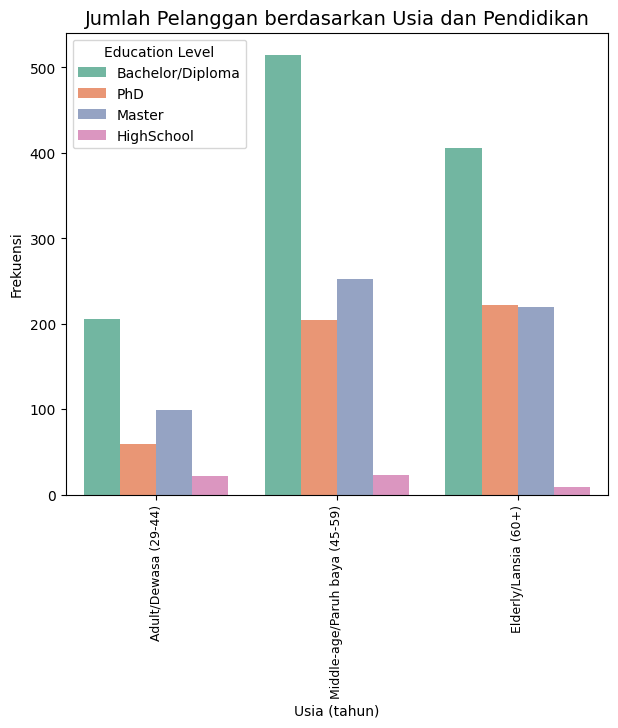

In [69]:
plt.figure(figsize = (7,6))
sns.countplot(data = df_clean,
              x = df_clean['AgeCategory'],
              hue = df_clean['Education'],
              palette = 'Set2',
              order=['Adult/Dewasa (29-44)', 'Middle-age/Paruh baya (45-59)', 'Elderly/Lansia (60+)'])
plt.title('Jumlah Pelanggan berdasarkan Usia dan Pendidikan', size = 14)
plt.xlabel('Usia (tahun)', size = 10)
plt.ylabel('Frekuensi', size = 10)
plt.xticks(rotation = 90, size = 9)
plt.legend(title = 'Education Level')
plt.show()

Dari bar chart di atas, didapatkan insight:
- Jumlah customer yang terbanyak adalah yang berusia Middle-age/Paruh Baya dengan tingkat pendidikan Bachelor/Diploma (Strata 1), di urutan kedua adalah yang berusia Elderly/Lansia dengan tingkat pendidikan Bachelor dan jumlah customer yang paling sedikit adalah yang berusia Adult/Dewasa dengan tingkat pendidikan Master (Strata 2)

### Profil Pelanggan berdasarkan Usia dan Status Pernikahan

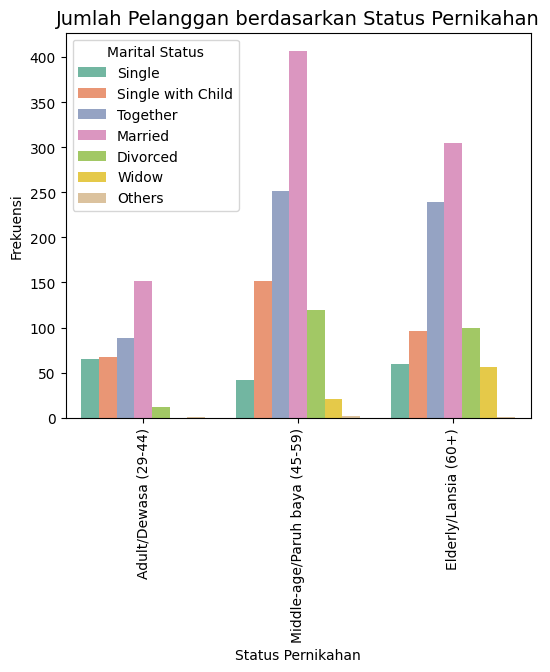

In [70]:
plt.figure(figsize = (6,5))
sns.countplot(data=df_clean,
                         x = df_clean['AgeCategory'],
                         hue = df_clean['MaritalStatus'], 
                         palette = 'Set2',
                         order=['Adult/Dewasa (29-44)', 'Middle-age/Paruh baya (45-59)', 'Elderly/Lansia (60+)'])
plt.title('Jumlah Pelanggan berdasarkan Status Pernikahan', size = 14)
plt.xlabel('Status Pernikahan', size = 10)
plt.ylabel('Frekuensi', size = 10)
plt.xticks(rotation = 90, size = 10)
plt.legend(title = 'Marital Status')
plt.show()

Dari bar chart di atas, didapatkan insight:
- Jumlah customer yang terbanyak adalah customer berstatus Married dari semua status Pernikahan dan berusia Middle-age/Paruh baya dan jumlah customer terbanyak di urutan kedua adalah customer berstatus Married dan berusia Elderly/Lansia, di urutan ketiga adalah customer berstatus Together dan berusia Middle-age/Paruh baya.

### Profil Pelanggan berdasarkan Status Pernikahan dan Jumlah Anak Kecil

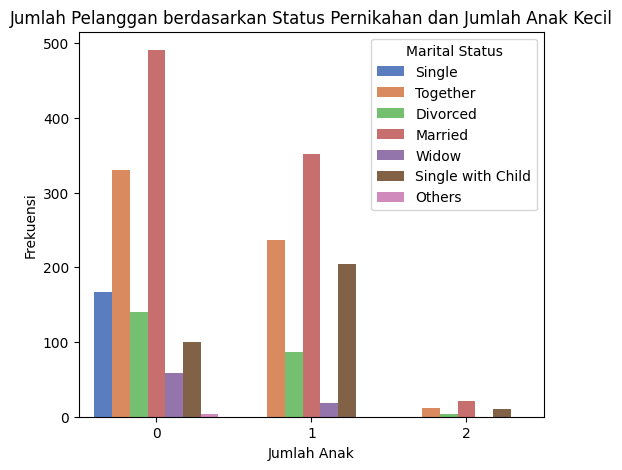

In [71]:
plt.figure(figsize = (6,5))
sns.countplot(data = df_clean,
              x = df_clean['Kidhome'],
              hue = df_clean['MaritalStatus'],
              palette = 'muted')
plt.title('Jumlah Pelanggan berdasarkan Status Pernikahan dan Jumlah Anak Kecil')
plt.xlabel('Jumlah Anak')
plt.ylabel('Frekuensi')
plt.legend(title = 'Marital Status')
plt.show()

Dari bar chart di atas, didapatkan insight:
- Jumlah Customer terbanyak adalah yang berstatus Married dan tidak memiliki anak.
- Customer cukup banyak adalah customer dengan Status Pernikahan Married dan memiliki 1 anak kecil.

### Profil Pelanggan berdasarkan Status Pernikahan dan Jumlah Anak Remaja

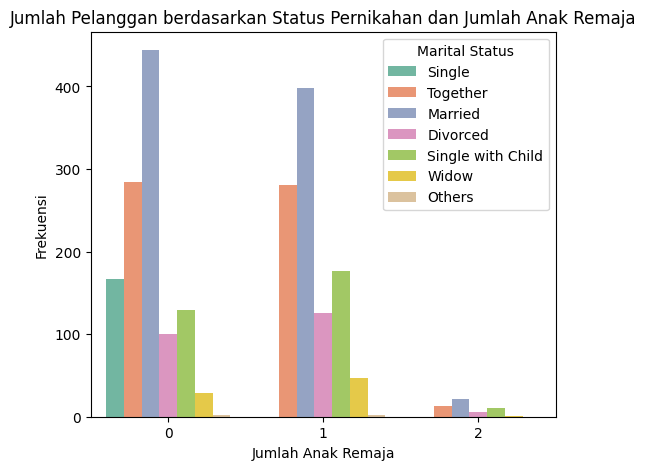

In [72]:
plt.figure(figsize = (6,5))
sns.countplot(data=df_clean,
              x=df_clean['Teenhome'],
              hue=df_clean['MaritalStatus'],
              palette = 'Set2')
plt.title('Jumlah Pelanggan berdasarkan Status Pernikahan dan Jumlah Anak Remaja')
plt.xlabel('Jumlah Anak Remaja')
plt.ylabel('Frekuensi')
plt.legend(title = 'Marital Status')
plt.show()

Dari bar chart di atas, didapatkan insight:
- Customer terbanyak adalah customer dengan Status Pernikahan Married dan tidak memiliki anak remaja. Namun tidak beda jauh dengan customer dengan Status Pernikahan Married dan memiliki 1 anak remaja.

### **Korelasi antara Variable Numerical `Age`, `Income`, `Kidhome`, `Teenhome`, `Recency`, `TotalSpending`, `TotalTransactions`**

In [73]:
# Uji normalitas untuk distribusi data Age, Income, Kidhome, Teenhome, Recency, TotalSpending

display(shapiro(df_clean['Age'])[1] < 0.05) 
display(shapiro(df_clean['Income'])[1] < 0.05)
display(shapiro(df_clean['Kidhome'])[1] < 0.05)
display(shapiro(df_clean['Teenhome'])[1] < 0.05)
display(shapiro(df_clean['Recency'])[1] < 0.05)
display(shapiro(df_clean['TotalSpending'])[1] < 0.05)
display(shapiro(df_clean['TotalTransactions'])[1] < 0.05)

np.True_

np.True_

np.True_

np.True_

np.True_

np.True_

np.True_

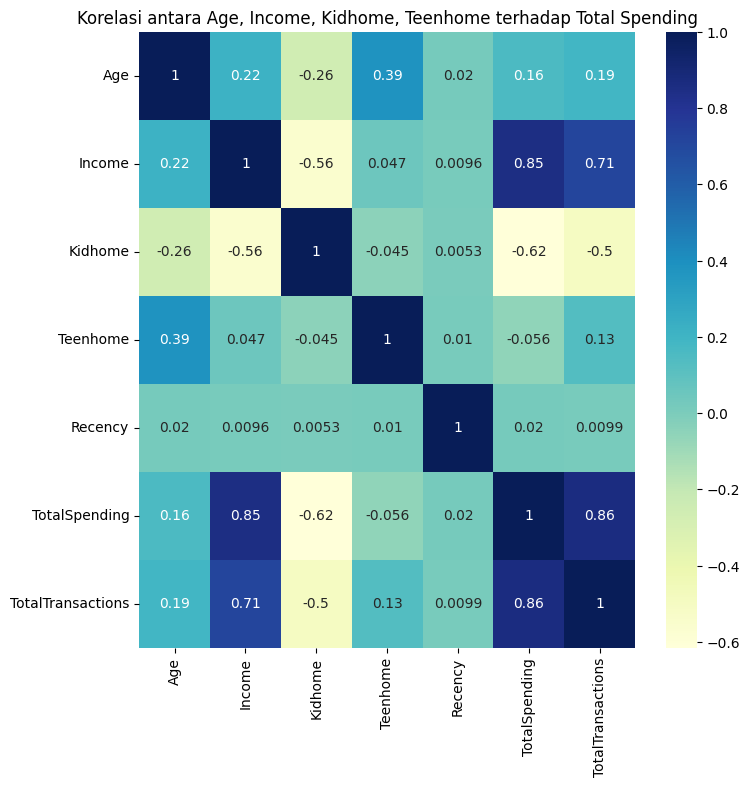

In [74]:
# membuat variabel baru untuk cek heatmap

corr_totalspend = df_clean[['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'TotalSpending', 'TotalTransactions']].corr(method = 'spearman')

# heatmap untuk cek korelasi antara Age, Income, Kidhome, Teenhome terhadap Total Spending

plt.figure(figsize = (8,8))
sns.heatmap(corr_totalspend, annot=True, cmap = 'YlGnBu')
plt.title('Korelasi antara Age, Income, Kidhome, Teenhome terhadap Total Spending')

plt.show()

Berdasarkan heatmap:
- `Income` adalah yang paling berkorelasi dengan `TotalSpending` dan `TotalTransactions` dengan arah korelasi yang positif. Hal ini berarti semakin besar Income maka semakin besar Total Spending dan Total Transactions.
- `Kidhome` memiliki korelasi yang medium dengan `TotalSpending` dan arah korelasi yang negatif. Hal ini berarti ketika jumlah anak kecil sedikit, total spending semakin besar. 
- `Teenhome` memiliki korelasi yang lemah terhadap `TotalSpending` dengan arah korelasi yang negatif. Hal ini berarti ketika jumlah anak remaja sedikit, total spending semakin besar. 
- `Age` memiliki korelasi yang lemah terhadap `TotalSpending` dengan arah korelasi yang positif. Hal ini berarti seiring meningkatnya usia, total spending juga meningkat.
- `Recency` memiliki korelasi yang lemah terhadap `TotalSpending` dengan arah korelasi yang positif. Hal ini berarti seiring meningkatnya recency, total spending juga meningkat.
- `Recency` memiliki korelasi yang lemah terhadap `TotalTransactions` dengan arah korelasi yang positif. Hal ini berarti seiring meningkatnya recency, total spending juga meningkat.
- `TotalSpending` memiliki korelasi yang kuat terhadap `TotalTransactions` dengan arah korelasi yang positif. Hal ini berarti seiring meningkatnya total spending, total transaksi juga meningkat.

### `TotalTransactions` dan `TotalSpending`

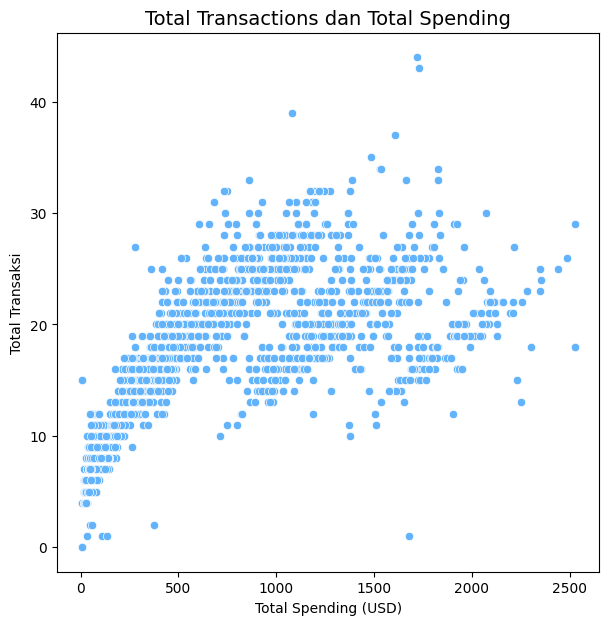

In [75]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=df_clean['TotalSpending'], 
                y=df_clean['TotalTransactions'],
                color = "#62b3fa")
plt.title('Total Transactions dan Total Spending', size = 14)
plt.xlabel('Total Spending (USD)', size = 10)
plt.ylabel('Total Transaksi', size = 10)
plt.show()

Dari scatterplot di atas:
- Total Spending customer berkorelasi dengan Total Transactions.
- Semakin tinggi Total Spending customer, semakin tinggi pula Total Transactions.

### `Income` dan `TotalSpending`

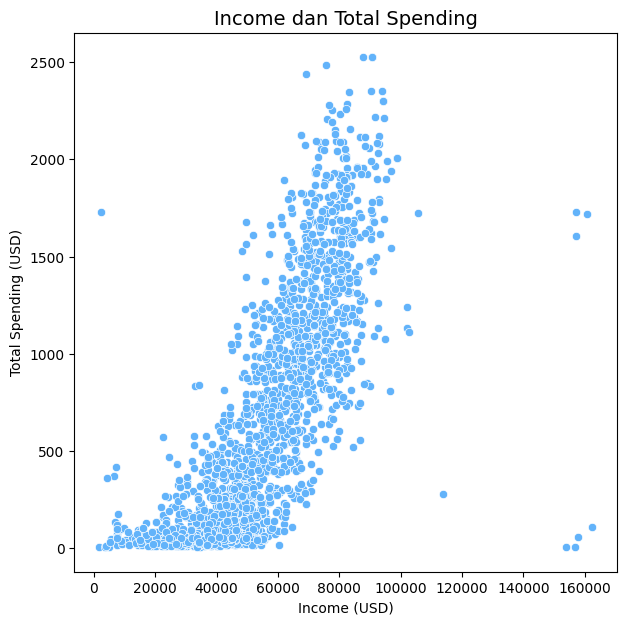

In [76]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=df_clean['Income'], 
                y=df_clean['TotalSpending'],
                color = "#62b3fa")
plt.title('Income dan Total Spending', size = 14)
plt.xlabel('Income (USD)', size = 10)
plt.ylabel('Total Spending (USD)', size = 10)
plt.show()

Dari scatterplot di atas:
- Total Spending customer dipengaruhi oleh Income.
- Semakin tinggi Income customer, semakin tinggi pula Total Spending.

#### `IncomeCategory` dan `TotalSpending`

In [77]:
df_income = df_clean[['IncomeCategory','TotalSpending']].groupby('IncomeCategory').agg(['median', 'sum', 'count']).reset_index()

df_income

IncomeCategory TotalSpending              
                        median     sum count
0        50K-70K         725.0  495064   663
1           <50K          69.0  162462  1067
2           >70K        1375.5  697460   506

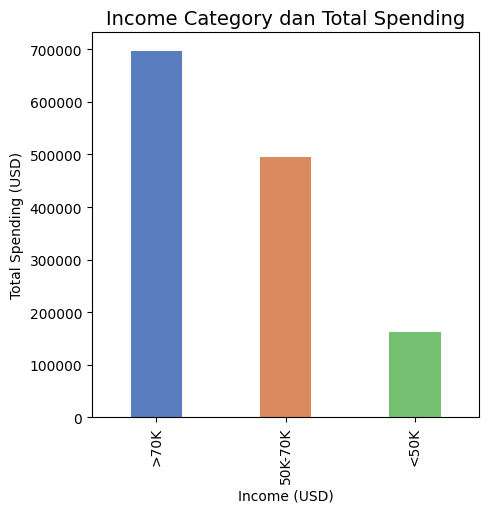

In [78]:
plt.figure(figsize = (5,5))
sns.barplot(data=df_clean,
            x='IncomeCategory',
            y='TotalSpending',
            estimator = 'sum',
            errorbar = None,
            palette = 'muted',
            order = ['>70K', '50K-70K', '<50K'],
            width = 0.4)
plt.title('Income Category dan Total Spending', size = 14)
plt.xlabel('Income (USD)', size = 10)
plt.ylabel('Total Spending (USD)', size = 10)
plt.xticks(rotation = 90, size = 10)
plt.show()

Dari bar chart di atas, didapatkan insight:
- Terdapat perbedaan signifikan Total Spending pada tiap tingkat Income.
- Customer dengan Total Spending terbesar berasal dari kategori >70K USD.

### Jumlah Anak Kecil dan Total Spending

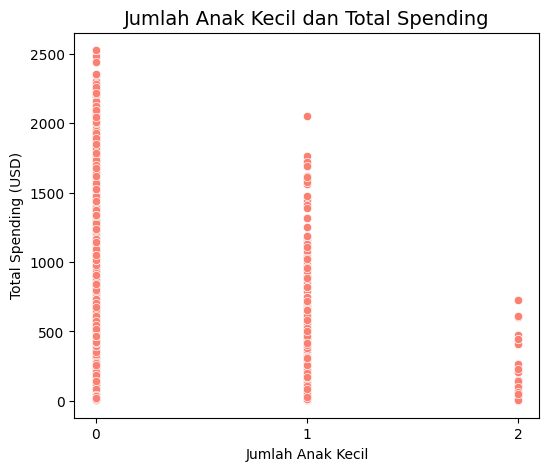

In [79]:
plt.figure(figsize = (6,5))
sns.scatterplot(data = df_clean,
                x ='Kidhome', 
                y ='TotalSpending',
                color = 'salmon') 
plt.title('Jumlah Anak Kecil dan Total Spending', size = 14)
plt.xlabel('Jumlah Anak Kecil', size = 10)
plt.ylabel('Total Spending (USD)', size = 10)
plt.xticks([0, 1, 2])
plt.show()

Dari scatterplot di atas:
- Total spending berdasarkan jumlah anak kecil berbeda secara signifikan pada setiap jumlah anak kecil.
- Customer yang memiliki total spending yang terbesar adalah customer yang tidak memiliki anak kecil.
- Customer yang memiliki total spending yang besar di urutan kedua adalah customer yang memiliki 1 anak kecil.

### Jumlah Anak Remaja dan Total Spending

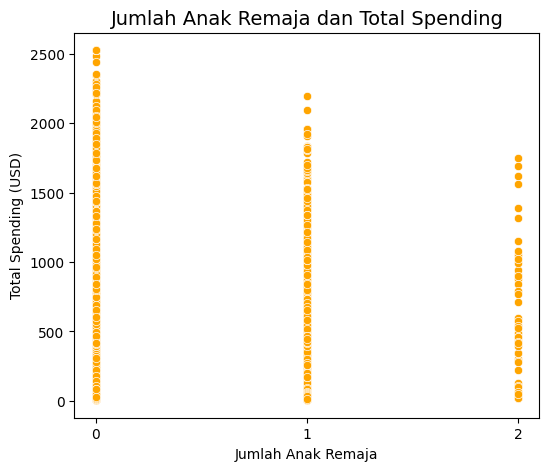

In [80]:
plt.figure(figsize = (6,5))
sns.scatterplot(x = df_clean['Teenhome'], 
                y = df_clean['TotalSpending'],
                color = 'orange')
plt.title('Jumlah Anak Remaja dan Total Spending', size = 14)
plt.xlabel('Jumlah Anak Remaja', size = 10)
plt.ylabel('Total Spending (USD)', size = 10)
plt.xticks([0, 1, 2])
plt.show()

Dari bar chart:
- Ada perbedaan Total Spending pada tiap jumlah anak remaja. 
- Tetapi akan diuji hipotesis testing untuk memastikan ada perbedaan signifikan Total Spending pada tiap jumlah anak remaja.

#### Apakah ada perbedaan antara signifikan Total Spending pada setiap jumlah anak remaja?

Hipotesis:

- H0 = Tidak ada perbedaan signifikan Total Spending pada setiap jumlah anak remaja.
- H1 = Ada perbedaan signifikan Total Spending pada setiap jumlah anak remaja.

In [81]:
stat_kruskal_teen, pval_kruskal_teen = kruskal(df_clean[df_clean['Teenhome'] == '0']['TotalSpending'],
                                    df_clean[df_clean['Teenhome'] == '1']['TotalSpending'],
                                    df_clean[df_clean['Teenhome'] == '2']['TotalSpending'])


if pval_kruskal_teen < 0.05:
    print("Tolak H0, Ada perbedaan antara signifikan Total Spending pada setiap jumlah anak remaja.")
else:
    print("Gagal tolak HO, Tidak ada perbedaan antara signifikan Total Spending pada setiap jumlah anak remaja.")

Gagal tolak HO, Tidak ada perbedaan antara signifikan Total Spending pada setiap jumlah anak remaja.


Berdasarkan scatterplot dan uji statistik:
- Perbedaan Total Spending pada tiap Jumlah Anak Remaja tidak signifikan. Oleh karena itu, variabel Jumlah Anak Remaja tidak menjadi faktor yang memengaruhi tingkat spending.

### `AgeCategory` dan `TotalSpending`

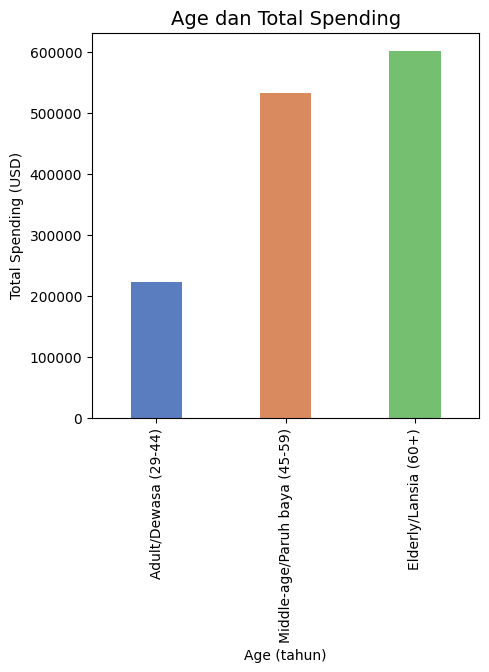

In [82]:
plt.figure(figsize = (5,5))
sns.barplot(data=df_clean,
            x='AgeCategory',
            y='TotalSpending',
            estimator = 'sum',
            errorbar = None,
            palette = 'muted',
            width = 0.4,
            order = ['Adult/Dewasa (29-44)', 'Middle-age/Paruh baya (45-59)', 'Elderly/Lansia (60+)'])
plt.title('Age dan Total Spending', size = 14)
plt.xlabel('Age (tahun)', size = 10)
plt.ylabel('Total Spending (USD)', size = 10)
plt.xticks(rotation = 90, size = 10)
plt.show()

Dari bar chart:
- Ada perbedaan Total Spending pada tiap kategori usia. 
- Tetapi akan diuji hipotesis testing untuk memastikan ada perbedaan signifikan rata-rata Total Spending pada tiap kategori usia.

#### Apakah ada perbedaan antara signifikan Total Spending pada setiap kategori usia?

Hipotesis:

- H0 = Tidak ada perbedaan signifikan rata-rata Total Spending pada setiap kategori usia.
- H1 = Ada perbedaan signifikan rata-rata Total Spending pada setiap kategori usia.

In [83]:
stat_kruskal_age, pval_kruskal_age = kruskal(df_clean[df_clean['AgeCategory'] == 'Adult/Dewasa (29-44)']['TotalSpending'],
                                    df_clean[df_clean['AgeCategory'] == 'Middle-age/Paruh baya (45-59)']['TotalSpending'],
                                    df_clean[df_clean['AgeCategory'] == 'Elderly/Lansia (60+)']['TotalSpending'])


if pval_kruskal_age < 0.05:
    print("Tolak H0, Ada perbedaan signifikan rata-rata Total Spending pada setiap kategori usia.")
else:
    print("Gagal tolak HO, Tidak ada perbedaan signifikan rata-rata Total Spending pada setiap kategori usia.")

Tolak H0, Ada perbedaan signifikan rata-rata Total Spending pada setiap kategori usia.


Dari bar chart dan uji statistik:
- Ada perbedaan signifikan antara Total Spending pada setiap kategori usia.
- Customer dengan Total Spending terbesar berasal dari kategori usia Elderly/Lansia 60 tahun ke atas dan kedua terbesar adalah usia Middle-age/Paruh baya 45-59 tahun.

### `Education` dan `TotalSpending`

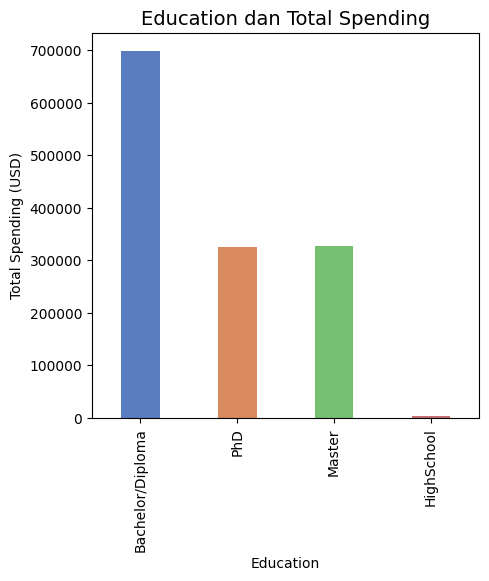

In [84]:
plt.figure(figsize = (5,5))
sns.barplot(data=df_clean,
            x='Education',
            y='TotalSpending',
            estimator = 'sum',
            errorbar = None,
            palette = 'muted',
            width = 0.4)
plt.title('Education dan Total Spending', size = 14)
plt.xlabel('Education', size = 10)
plt.ylabel('Total Spending (USD)', size = 10)
plt.xticks(rotation = 90, size = 10)
plt.show()

Berdasarkan bar chart:
- Customer dengan pendidikan tingkat pendidikan 'Bachelor/Diploma' memiliki total spending yang paling besar. 
- HighSchool masuk akal yang paling rendah untuk total spendingnya.

### `Education` dan `Income`

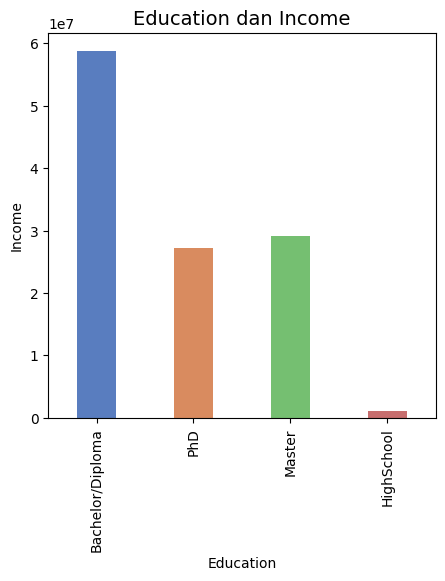

In [85]:
plt.figure(figsize = (5,5))
sns.barplot(data=df_clean,
            x='Education',
            y='Income',
            estimator = 'sum',
            errorbar = None,
            palette = 'muted',
            width = 0.4)
plt.title('Education dan Income', size = 14)
plt.xlabel('Education', size = 10)
plt.ylabel('Income', size = 10)
plt.xticks(rotation = 90, size = 10)
plt.show()

Dari bar chart:
- Income terbesar dari tingkat pendidikan Bachelor/Diploma. 
- Total spending Bachelor/Diploma yang terbesar menjadi masuk akal karena Income terbesar berasal dari tingkat pendidikan Bachelor/Diploma.
- Hal ini berarti tingkat Income berhubungan erat dengan pendidikan sehingga pada analisis ini hanya akan pakai Income saja dalam analisis demografi pelanggan.

### `MaritalStatus` dan `TotalSpending`

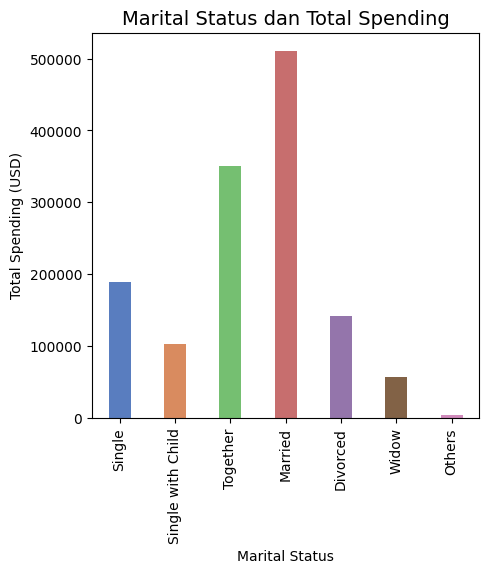

In [86]:
plt.figure(figsize = (5,5))
sns.barplot(data=df_clean,
            x='MaritalStatus',
            y='TotalSpending',
            estimator = 'sum',
            errorbar = None,
            palette = 'muted',
            width = 0.4)
plt.title('Marital Status dan Total Spending', size = 14)
plt.xlabel('Marital Status', size = 10)
plt.ylabel('Total Spending (USD)', size = 10)
plt.xticks(rotation = 90, size = 10)
plt.show()

Dari bar chart:
- Ada perbedaan Total Spending pada tiap kategori status pernikahan. 
- Tetapi akan diuji hipotesis testing untuk memastikan ada perbedaan signifikan Total Spending pada tiap kategori status pernikahan.

#### Apakah ada perbedaan antara signifikan Total Spending pada setiap Status Pernikahan?

Hipotesis:

- H0 = Tidak ada perbedaan antara signifikan Total Spending pada setiap Status Pernikahan.
- H1 = Ada perbedaan antara signifikan Total Spending pada setiap Status Pernikahan.

In [87]:
stat_kruskal_marital, pval_kruskal_marital = kruskal(df_clean[df_clean['MaritalStatus'] == 'Single']['TotalSpending'],
                                    df_clean[df_clean['MaritalStatus'] == 'Single with Child']['TotalSpending'],
                                    df_clean[df_clean['MaritalStatus'] == 'Together']['TotalSpending'],
                                    df_clean[df_clean['MaritalStatus'] == 'Married']['TotalSpending'],
                                    df_clean[df_clean['MaritalStatus'] == 'Divorced']['TotalSpending'],
                                    df_clean[df_clean['MaritalStatus'] == 'Widow']['TotalSpending'],
                                    df_clean[df_clean['MaritalStatus'] == 'Others']['TotalSpending'])


if pval_kruskal_marital < 0.05:
    print("Tolak H0, Ada perbedaan antara signifikan Total Spending pada setiap Status Pernikahan.")
else:
    print("Gagal tolak HO, Tidak ada perbedaan antara signifikan Total Spending pada setiap Status Pernikahan.")

Tolak H0, Ada perbedaan antara signifikan Total Spending pada setiap Status Pernikahan.


Berdasarkan bar chart dan hasil uji statistik:
- Ada perbedaan signifikan Total Spending pada setiap Status Pernikahan.
- Customer dengan Status Pernikahan Married memiliki total spending terbesar, diurutan kedua terbesar total spending terbesar adalah customer yang berstatus Together.
- Hal ini berarti customer yang berpasangan memiliki total spending yang terbesar di antara customer yang lainnya.

## **Karakteristik pelanggan dengan Total Spending (Monetary) yang besar untuk acuan akuisisi pelanggan baru**:
- Customer yang memiliki total spending yang terbesar adalah customer dengan Income >70K dan 50K-70K, berstatus Married dan Together dan tidak memiliki anak kecil.
- Customer yang mapan secara finansial, matang secara usia dan sudah berpasangan. Mereka punya disposable Income yang besar karena tidak ada tanggungan anak.

## **Efektivitas Campaign Marketing**

In [88]:
campaign_cols = df_clean[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                          'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']]

# hitung jumlah accepted per campaign
campaign_sum = campaign_cols.sum()

# hitung total customer
total_customers = df_clean.shape[0]

# hitung persentase acceptance rate tiap campaign
campaign_percentage = ((campaign_sum / total_customers) * 100).round(1)

# buat DataFrame
campaign_summary = pd.DataFrame({
    'Campaign': campaign_sum.index,
    'Total Accepted': campaign_sum.values,
    'Acceptance Rate (%)': campaign_percentage.values
})

campaign_summary

,Campaign,Total Accepted,Acceptance Rate (%)
0,AcceptedCmp1,144,6.4
1,AcceptedCmp2,30,1.3
2,AcceptedCmp3,163,7.3
3,AcceptedCmp4,167,7.5
4,AcceptedCmp5,162,7.2
5,AcceptedCmp6,334,14.9


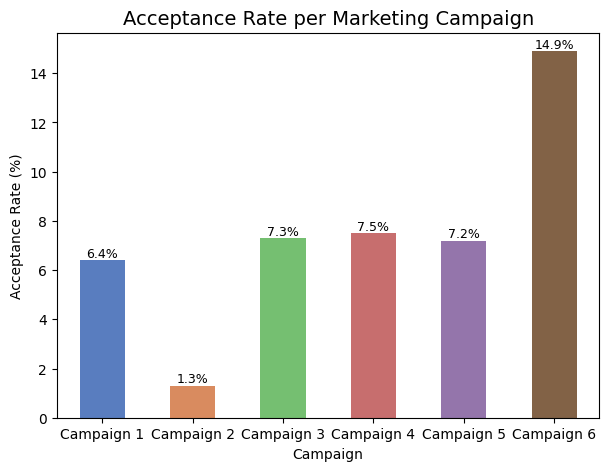

In [89]:
# buat bar chart

plt.figure(figsize = (7,5))
bar_plot = sns.barplot(data = campaign_summary,
            x = 'Campaign',
            y = 'Acceptance Rate (%)',
            errorbar= None,
            palette = 'muted',
            width = 0.5)
for i in bar_plot.containers:
    bar_plot.bar_label(i, fmt='%.1f%%', size = 9)
plt.title('Acceptance Rate per Marketing Campaign', size = 14)
plt.xlabel('Campaign', size = 10)
plt.ylabel('Acceptance Rate (%)', size = 10)
plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],                  # Posisi tick (sesuai urutan categories)
    labels=['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Campaign 6'])
plt.show()

Dari bar chart di atas, didapatkan insight:
- Campaign yang acceptance ratenya tertinggi adalah Campaign 6 dengan persentase penerimaan campaign sebesar 14,9%.
- Campaign 3,4 dan 5 memiliki persentase tingkat penerimaan yang tidak jauh berbeda yaitu 7,3%, 7,5% dan 7,2% secara berurutan. 
- Campaign 1 memiliki persentase tingkat penerimaan sebesar 6,1%.
- Secara keseluruhan tiap campaign 1-6 masih belum optimal respons penerimaannya sehingga perlu untuk mengoptimalkan strategi campaign agar lebih efektif dan efisien.

Berdasarkan dataset, belum ada segmentasi pelanggan yang terarah untuk mengoptimalisasi strategi marketing. Oleh karena itu akan dilakukan analisis segmentasi pelanggan untuk mengetahui perilaku dan nilai pelanggan.

# **Segmentasi Pelanggan**

Dalam analisis ini segmentasi pelanggan dilakukan menggunakan metode RFM (Recency, Frequency, Monetary). Pendekatan ini membantu mengelompokkan pelanggan berdasarkan seberapa baru, sering, dan besar nilai transaksi mereka. Dengan demikian, perusahaan dapat memprioritaskan campaign yang lebih efektif sesuai karakteristik setiap segmen.
Berdasarkan penelitian sebelumnya (Wei et al., 2012; Venkatesan & Kumar, 2004), penggunaan RFM terbukti meningkatkan akurasi segmentasi dan efektivitas strategi pemasaran berbasis data.
- R (Recency) → Kapan terakhir kali pelanggan melakukan transaksi
- F (Frequency) → Seberapa sering pelanggan bertransaksi
- M (Monetary) → Berapa besar nilai total uang yang dikeluarkan pelanggan

In [90]:
segment = df_clean[['ID','TotalSpending', 'Recency', 'TotalTransactions']]

segment

,ID,TotalSpending,Recency,TotalTransactions
0,5524,1617,58,25
1,2174,27,38,6
2,4141,776,26,21
3,6182,53,26,8
4,5324,422,94,19
...,...,...,...,...
2235,10870,1341,46,18
2236,4001,444,56,22
2237,7270,1241,91,19
2238,8235,843,8,23


In [91]:
segment = segment.sort_values(by = ['TotalSpending', 'Recency', 'TotalTransactions'], ascending = False)

segment

,ID,TotalSpending,Recency,TotalTransactions
1179,5735,2525,29,18
1572,5350,2525,29,18
1492,1763,2524,62,29
987,4580,2486,46,26
1052,4475,2440,82,25
...,...,...,...,...
2129,10104,8,65,4
1420,5824,8,1,4
655,5555,6,81,0
981,3955,6,20,0


In [92]:
# 1. Skoring Manual RFM Berdasarkan Kuantil

# Recency: semakin kecil semakin baik
def r_score(x):
    if x <= df_clean['Recency'].quantile(0.2):
        return 5
    elif x <= df_clean['Recency'].quantile(0.4):
        return 4
    elif x <= df_clean['Recency'].quantile(0.6):
        return 3
    elif x <= df_clean['Recency'].quantile(0.8):
        return 2
    else:
        return 1

# Frequency: semakin besar semakin baik
def f_score(x):
    if x <= df_clean['TotalTransactions'].quantile(0.2):
        return 1
    elif x <= df_clean['TotalTransactions'].quantile(0.4):
        return 2
    elif x <= df_clean['TotalTransactions'].quantile(0.6):
        return 3
    elif x <= df_clean['TotalTransactions'].quantile(0.8):
        return 4
    else:
        return 5

# Monetary: semakin besar semakin baik
def m_score(x):
    if x <= df_clean['TotalSpending'].quantile(0.2):
        return 1
    elif x <= df_clean['TotalSpending'].quantile(0.4):
        return 2
    elif x <= df_clean['TotalSpending'].quantile(0.6):
        return 3
    elif x <= df_clean['TotalSpending'].quantile(0.8):
        return 4
    else:
        return 5

# 2. Apply Skor ke Tiap Pelanggan ---
df_clean['R_Score'] = df_clean['Recency'].apply(r_score)
df_clean['F_Score'] = df_clean['TotalTransactions'].apply(f_score)
df_clean['M_Score'] = df_clean['TotalSpending'].apply(m_score)

# 3. Hitung Total RFM Score
df_clean['RFM_Score'] = (
    df_clean['R_Score'] + df_clean['F_Score'] + df_clean['M_Score']
)

# 4. Segmentasi Pelanggan Berdasarkan Kombinasi R, F, M
def segment_main(row):
    R, F, M = row['R_Score'], row['F_Score'], row['M_Score']

    # Top Customers
    if (R >= 4 and F >= 4 and M >= 4):
        return 'Top Customers'  # Sangat aktif, sering transaksi, spending besar

    # Loyal Customers
    elif (R >= 3 and F >= 4 and M >= 3):
        return 'Loyal Customers'  # Konsisten, sering membeli, nilai tinggi

    # Potential Customers
    elif (R >= 3 and F >= 3 and M >= 2):
        return 'Potential Customers'  # Cukup aktif

    # Needs Attention 
    elif (R >= 2 and F >= 2 and M >= 2):
        return 'Needs Attention'  # Aktivitas menurun

    # At Risk Customers 
    elif (R <= 2 and (F >= 2 or M >= 2)):
        return 'At Risk Customers'  # Mulai jarang transaksi, risiko churn

    # Lost Customers
    else:
        return 'Lost Customers'  # Tidak aktif, kemungkinan churn


# 5. Apply ke DataFrame
df_clean['Segment'] = df_clean.apply(segment_main, axis=1)

display(df_clean[['Recency', 'TotalTransactions', 'TotalSpending',
                'R_Score', 'F_Score', 'M_Score',
                'RFM_Score', 'Segment']].head())

,Recency,TotalTransactions,TotalSpending,R_Score,F_Score,M_Score,RFM_Score,Segment
0,58,25,1617,3,5,5,13,Loyal Customers
1,38,6,27,4,1,1,6,Lost Customers
2,26,21,776,4,4,4,12,Top Customers
3,26,8,53,4,2,1,7,Lost Customers
4,94,19,422,1,4,3,8,At Risk Customers


## Tabel Rata-rata R,F,M Score

In [93]:
df_clean[['Segment','R_Score', 'F_Score', 'M_Score']].groupby('Segment').mean().round().sort_values('Segment', ascending = False)

,R_Score,F_Score,M_Score
Segment,,,
Top Customers,4.0,5.0,4.0
Potential Customers,4.0,3.0,3.0
Needs Attention,3.0,3.0,3.0
Loyal Customers,3.0,4.0,4.0
Lost Customers,3.0,1.0,1.0
At Risk Customers,1.0,3.0,3.0


| **Segment**             | **Kriteria RFM dan Perilaku Pelanggan**                                                                                                                                                                                |
| ----------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Top Customers**       | **R ≥ 4, F ≥ 4, M ≥ 4.** Pelanggan dengan nilai tertinggi di semua aspek. Sangat aktif, sering bertransaksi, dan memiliki nilai belanja tinggi dan stabil.                             |
| **Loyal Customers**     | **R ≥ 3, F ≥ 4, M ≥ 3.** Pelanggan yang rutin bertransaksi. Nilai belanja stabil dan frekuensi tinggi, meskipun tidak seintens Top Customers.                                               |
| **Potential Customers** | **R ≥ 3, F ≥ 3, M ≥ 2.** Pelanggan yang cukup aktif dan memiliki untuk menjadi loyal. Transaksi cukup sering dengan nilai menengah.                                           |
| **Needs Attention**     | **R ≥ 2, F ≥ 2, M ≥ 2.** Aktivitas mulai menurun. Transaksi tidak terlalu sering dan nilai belanja sedang.                                                                                  |
| **At Risk Customers**   | **R ≤ 2 dan (F ≥ 2 atau M ≥ 2).** Aktivitas menurun tajam; sudah cukup lama tidak bertransaksi meski pernah aktif, risiko churn.                                             |
| **Lost Customers**      | **R, F, dan M rendah (umumnya ≤ 2).** Tidak aktif, jarang atau hampir tidak bertransaksi.                                                                                               |

## Persentase Tiap Segmen Pelanggan

In [94]:
proportion_segment = df_clean[['ID','Segment']]

# Tambahkan kolom Count per Segment
proportion_segment['Count'] = proportion_segment.groupby('Segment').transform('count')

summary_segment = df_clean.groupby('Segment')['ID'].count().to_frame('Count')
summary_segment['Percentage'] = (summary_segment['Count'] / summary_segment['Count'].sum() * 100).round(2)
summary_segment = summary_segment.reset_index()

summary_segment


,Segment,Count,Percentage
0,At Risk Customers,406,18.16
1,Lost Customers,523,23.39
2,Loyal Customers,245,10.96
3,Needs Attention,508,22.72
4,Potential Customers,276,12.34
5,Top Customers,278,12.43


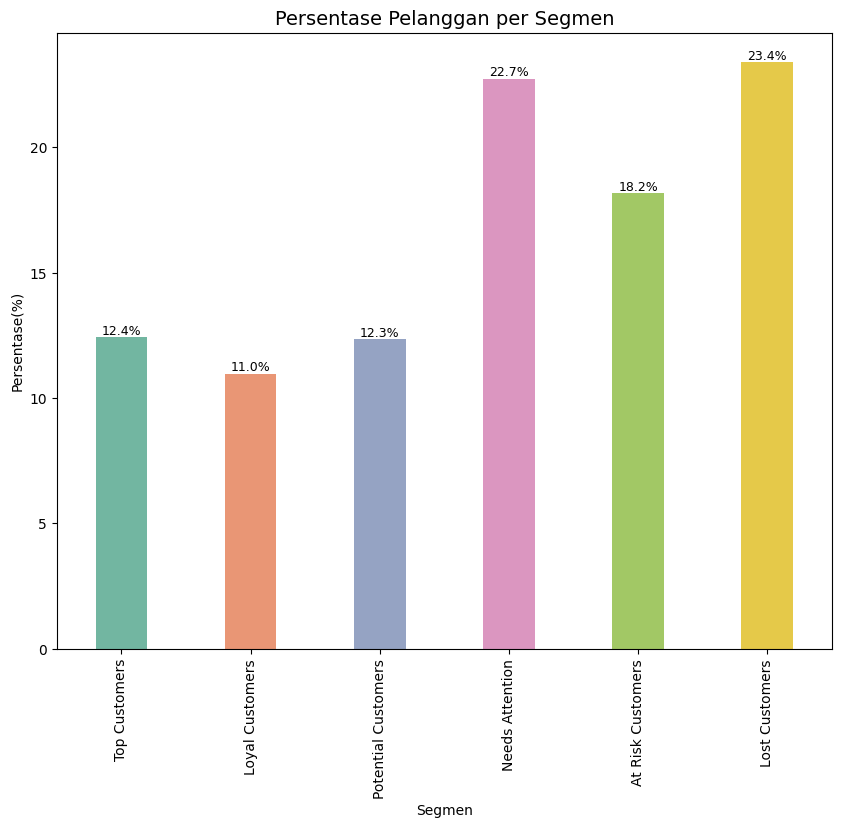

In [95]:
plt.figure(figsize=(10, 8))
bar_plot = sns.barplot(
    data=summary_segment,
    x='Segment',
    y='Percentage',
    errorbar=None,
    palette='Set2',
    width=0.4,
    order= ['Top Customers', 'Loyal Customers', 'Potential Customers', 'Needs Attention', 'At Risk Customers', 'Lost Customers']
)

# Tambahkan label persentase di tiap batang
for i in bar_plot.containers:
    bar_plot.bar_label(i, fmt='%.1f%%', size=9)

plt.title('Persentase Pelanggan per Segmen', size=14)
plt.xlabel('Segmen', size=10)
plt.ylabel('Persentase(%)', size=10)
plt.xticks(rotation = 90)
plt.show()

### 📊 **Insight RFM Segmentation:**

* **Loyal Customers (12,4%)** – Segmen terbesar; pelanggan aktif dan stabil.
* **Potential Customers (11%)** – Potensi tinggi jadi loyal.
* **Top Customers (12,3%)** – Paling bernilai.
* **Needs Attention (22,7%)** – Aktivitas belanja menurun.
* **At Risk Customers (18,2%)** – Mulai tidak aktif.
* **Lost Customers (23,4%)** – Hampir tidak aktif.

Berdasarkan analisis, pelanggan segmen Needs Attention, At Risk Customers, Lost Customers secara persentase merupakan segmen yang memiliki jumlah pelanggan terbesar. Oleh sebab itu, perlu dilakukan penanganan terhadap segmen tersebut melalui strategi perlakuan berdasarkan perilaku belanja.

# **Distribusi Top Spender pada tiap Segment RFM**

In [96]:
spenders = df_clean[['ID', 'IncomeCategory', 'MaritalStatus', 'Education', 'Kidhome', 'TotalSpending', 'Segment']]

spenders

,ID,IncomeCategory,MaritalStatus,Education,Kidhome,TotalSpending,Segment
0,5524,50K-70K,Single,Bachelor/Diploma,0,1617,Loyal Customers
1,2174,<50K,Single with Child,Bachelor/Diploma,1,27,Lost Customers
2,4141,>70K,Together,Bachelor/Diploma,0,776,Top Customers
3,6182,<50K,Together,Bachelor/Diploma,1,53,Lost Customers
4,5324,50K-70K,Married,PhD,1,422,At Risk Customers
...,...,...,...,...,...,...,...
2235,10870,50K-70K,Married,Bachelor/Diploma,0,1341,Loyal Customers
2236,4001,50K-70K,Together,PhD,2,444,Loyal Customers
2237,7270,50K-70K,Divorced,Bachelor/Diploma,0,1241,At Risk Customers
2238,8235,50K-70K,Together,Master,0,843,Top Customers


In [97]:
# sort values dari yg total spendingnya terbesar

spenders_by_spending = spenders.sort_values(by = 'TotalSpending', ascending = False)

spenders_by_spending

,ID,IncomeCategory,MaritalStatus,Education,Kidhome,TotalSpending,Segment
1572,5350,>70K,Single,Master,0,2525,Top Customers
1179,5735,>70K,Single,Master,0,2525,Top Customers
1492,1763,>70K,Together,Bachelor/Diploma,0,2524,Needs Attention
987,4580,>70K,Married,Bachelor/Diploma,0,2486,Loyal Customers
1052,4475,50K-70K,Married,PhD,0,2440,At Risk Customers
...,...,...,...,...,...,...,...
2129,10104,<50K,Together,Bachelor/Diploma,2,8,Lost Customers
1245,6862,<50K,Divorced,Bachelor/Diploma,0,8,At Risk Customers
655,5555,>70K,Divorced,Bachelor/Diploma,0,6,Lost Customers
981,3955,<50K,Divorced,Bachelor/Diploma,0,6,Lost Customers


In [98]:
# ambil Top 30% Spender dan bulatkan ke atas untuk memastikan mengambil 30% data teratas

n_top = int(np.ceil(0.3 * len(spenders_by_spending)))

top_spenders = spenders_by_spending.head(n_top)

top_spenders

,ID,IncomeCategory,MaritalStatus,Education,Kidhome,TotalSpending,Segment
1572,5350,>70K,Single,Master,0,2525,Top Customers
1179,5735,>70K,Single,Master,0,2525,Top Customers
1492,1763,>70K,Together,Bachelor/Diploma,0,2524,Needs Attention
987,4580,>70K,Married,Bachelor/Diploma,0,2486,Loyal Customers
1052,4475,50K-70K,Married,PhD,0,2440,At Risk Customers
...,...,...,...,...,...,...,...
1505,3643,50K-70K,Married,Master,0,928,Needs Attention
900,8624,>70K,Married,Bachelor/Diploma,0,928,Needs Attention
680,2891,50K-70K,Divorced,Bachelor/Diploma,0,928,Loyal Customers
1254,5011,50K-70K,Divorced,Bachelor/Diploma,0,928,Loyal Customers


In [99]:
df_clean['Segment_Spending'] = np.where(
    df_clean['ID'].isin(top_spenders['ID']),
    'Top Spender',
    'Non Top Spender'
)
df_clean.head()

,ID,Age,AgeCategory,Education,MaritalStatus,Income,IncomeCategory,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalSpending,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalTransactions,R_Score,F_Score,M_Score,RFM_Score,Segment,Segment_Spending
0,5524,68,Elderly/Lansia (60+),Bachelor/Diploma,Single,58138.0,50K-70K,0,0,58,635,88,546,172,88,88,1617,0,0,0,0,0,1,Yes,3,8,10,4,25,3,5,5,13,Loyal Customers,Top Spender
1,2174,71,Elderly/Lansia (60+),Bachelor/Diploma,Single with Child,46344.0,<50K,1,1,38,11,1,6,2,1,6,27,0,0,0,0,0,0,No,2,1,1,2,6,4,1,1,6,Lost Customers,Non Top Spender
2,4141,60,Elderly/Lansia (60+),Bachelor/Diploma,Together,71613.0,>70K,0,0,26,426,49,127,111,21,42,776,0,0,0,0,0,0,No,1,8,2,10,21,4,4,4,12,Top Customers,Non Top Spender
3,6182,41,Adult/Dewasa (29-44),Bachelor/Diploma,Together,26646.0,<50K,1,0,26,11,4,20,10,3,5,53,0,0,0,0,0,0,No,2,2,0,4,8,4,2,1,7,Lost Customers,Non Top Spender
4,5324,44,Adult/Dewasa (29-44),PhD,Married,58293.0,50K-70K,1,0,94,173,43,118,46,27,15,422,0,0,0,0,0,0,No,5,5,3,6,19,1,4,3,8,At Risk Customers,Non Top Spender


In [100]:
revenue_top_spenders = top_spenders[['ID', 'IncomeCategory', 'TotalSpending']]

revenue_top_spenders

,ID,IncomeCategory,TotalSpending
1572,5350,>70K,2525
1179,5735,>70K,2525
1492,1763,>70K,2524
987,4580,>70K,2486
1052,4475,50K-70K,2440
...,...,...,...
1505,3643,50K-70K,928
900,8624,>70K,928
680,2891,50K-70K,928
1254,5011,50K-70K,928


In [101]:
# Hitung total spending secara keseluruhan (Revenue total)
total_spending_all = spenders_by_spending['TotalSpending'].sum()

# Hitung total spending Top 30% Spenders (Revenue dari Top 30% Spenders)
total_spending_top = revenue_top_spenders['TotalSpending'].sum()

# Hitung total spending Non Top Spenders (Revenue dari Non Top Spenders)
# Revenue dari Non Top Spenders = Revenue total - Revenue dari total spending Top 30% Spenders
total_spending_non_top = total_spending_all - total_spending_top

In [102]:
# Persentase Revenue dari Top 30% Spenders
percentage_top_revenue = (total_spending_top / total_spending_all) * 100

# Persentase Revenue dari Non Top Spenders
percentage_nontop_revenue = (total_spending_non_top/ total_spending_all) * 100

print(f"Top 30% Spenders berkontribusi sebesar {percentage_top_revenue :.1f}% dari total revenue.")
print(f"Non Top Spenders berkontribusi {percentage_nontop_revenue:.1f}% dari total revenue.")

Top 30% Spenders berkontribusi sebesar 69.6% dari total revenue.
Non Top Spenders berkontribusi 30.4% dari total revenue.


In [103]:
# dictionary untuk membuat DataFrame Revenue

revenue = {
    'Segment': ['Top 30% Spenders', 'Non-Top Spenders'],
    'Revenue': [total_spending_top, total_spending_non_top]
}

revenue

{'Segment': ['Top 30% Spenders', 'Non-Top Spenders'],
 'Revenue': [np.int64(943107), np.int64(411879)]}

In [104]:
# Buat DataFrame Revenue
revenue_df = pd.DataFrame(revenue)

revenue_df['Percentage'] = (revenue_df['Revenue'] / revenue_df['Revenue'].sum()).round(3) * 100

revenue_df

,Segment,Revenue,Percentage
0,Top 30% Spenders,943107,69.6
1,Non-Top Spenders,411879,30.4


In [105]:
# Hitung jumlah top spender per segment
top_spenders_count = top_spenders.groupby('Segment')['TotalSpending'].count().reset_index()
top_spenders_count.rename(columns={'TotalSpending': 'Count'}, inplace=True)

# Persentase per segment (opsional)
top_spenders_count['Percentage'] = (top_spenders_count['Count'] / top_spenders_count['Count'].sum()) * 100

top_spenders_count

,Segment,Count,Percentage
0,At Risk Customers,125,18.628912
1,Lost Customers,1,0.149031
2,Loyal Customers,111,16.542474
3,Needs Attention,154,22.950820
4,Potential Customers,84,12.518629
5,Top Customers,196,29.210134


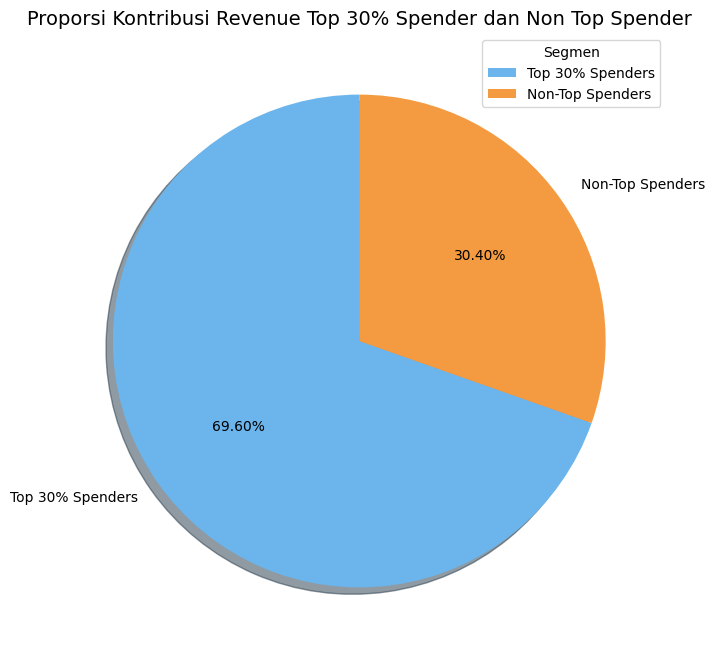

In [106]:
# Membuat Pie Chart Kontribusi Revenue

plt.figure(figsize = (8,8))
plt.pie(x = revenue_df['Percentage'], 
        labels = revenue_df['Segment'], 
        autopct = "%.2f%%",
        startangle = 90,
        shadow = True, 
        colors = ["#6cb5ec", "#f49b42"])
plt.legend(title = 'Segmen', loc = 'upper right')
plt.title('Proporsi Kontribusi Revenue Top 30% Spender dan Non Top Spender', size = 14)

plt.show()

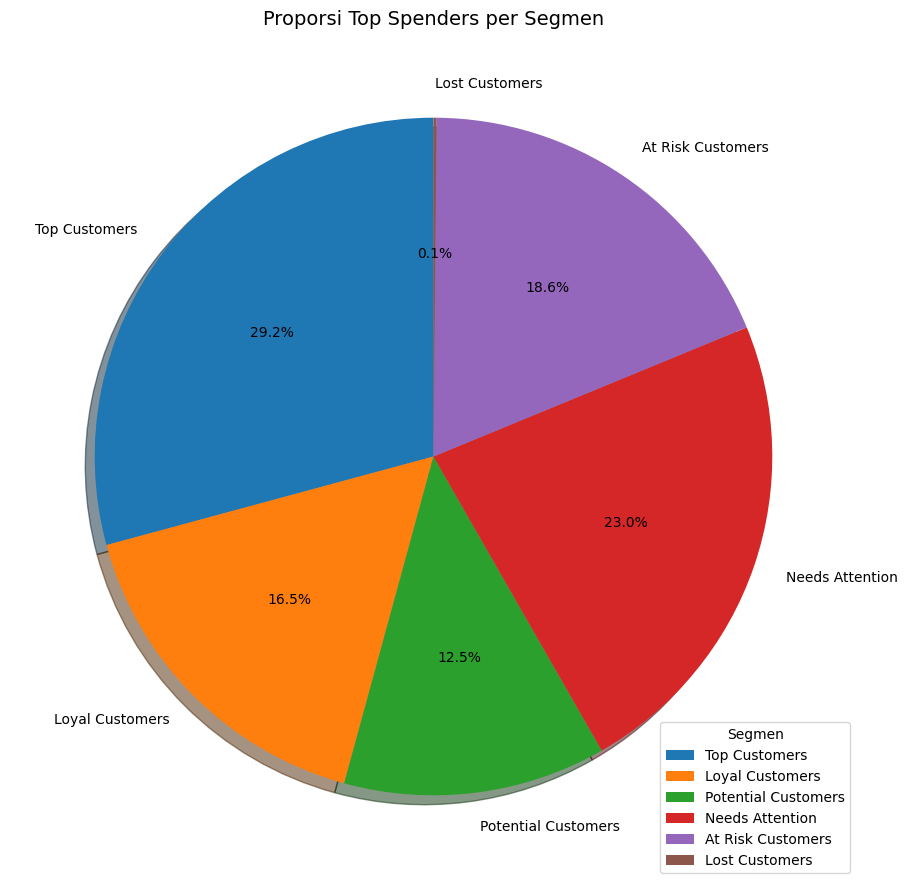

In [107]:
# Urutkan segment
segment_order = ['Top Customers', 'Loyal Customers', 'Potential Customers', 
                 'Needs Attention', 'At Risk Customers', 'Lost Customers']

top_spenders_count['Segment'] = pd.Categorical(
    top_spenders_count['Segment'],
    categories=segment_order,
    ordered=True
)

# Sort sesuai urutan kategori
top_spenders_count = top_spenders_count.sort_values('Segment')

# Buat pie chart
plt.figure(figsize=(11,11))
plt.pie(
    x=top_spenders_count['Percentage'], 
    labels=top_spenders_count['Segment'], 
    autopct="%.1f%%",
    startangle=90,
    shadow=True
)
plt.legend(
    title='Segmen', 
    loc='lower right', 
    labels=segment_order  # pastikan legend urut
)
plt.title('Proporsi Top Spenders per Segmen', size=14)
plt.show()

- Top Spenders berkontribusi sebesar ~70% dari total revenue, mereka tidak hanya berasal dari segment Top Customers (29,2%) saja, tetapi juga dari segmen Loyal (16,5%), Potential (12,5%), Needs Attention (23%) dan At Risk Customers (18,6%). 
- Oleh sebab itu, perlu untuk merancang strategi perlakuan pada tiap segmen.

# **Respons tiap Segment terhadap Campaign**

In [108]:
accept_campaign = df_clean[['Segment', 'AcceptedCampaign']].groupby('Segment')['AcceptedCampaign'].value_counts().reset_index(name='Count')

accept_campaign

,Segment,AcceptedCampaign,Count
0,At Risk Customers,No,308
1,At Risk Customers,Yes,98
2,Lost Customers,No,457
3,Lost Customers,Yes,66
4,Loyal Customers,No,148
5,Loyal Customers,Yes,97
6,Needs Attention,No,374
7,Needs Attention,Yes,134
8,Potential Customers,No,198
9,Potential Customers,Yes,78


In [109]:
accept_campaign['Percentage'] = (
    accept_campaign['Count'] / accept_campaign.groupby('Segment')['Count'].transform('sum') * 100
).round(2)

accept_campaign

,Segment,AcceptedCampaign,Count,Percentage
0,At Risk Customers,No,308,75.86
1,At Risk Customers,Yes,98,24.14
2,Lost Customers,No,457,87.38
3,Lost Customers,Yes,66,12.62
4,Loyal Customers,No,148,60.41
5,Loyal Customers,Yes,97,39.59
6,Needs Attention,No,374,73.62
7,Needs Attention,Yes,134,26.38
8,Potential Customers,No,198,71.74
9,Potential Customers,Yes,78,28.26


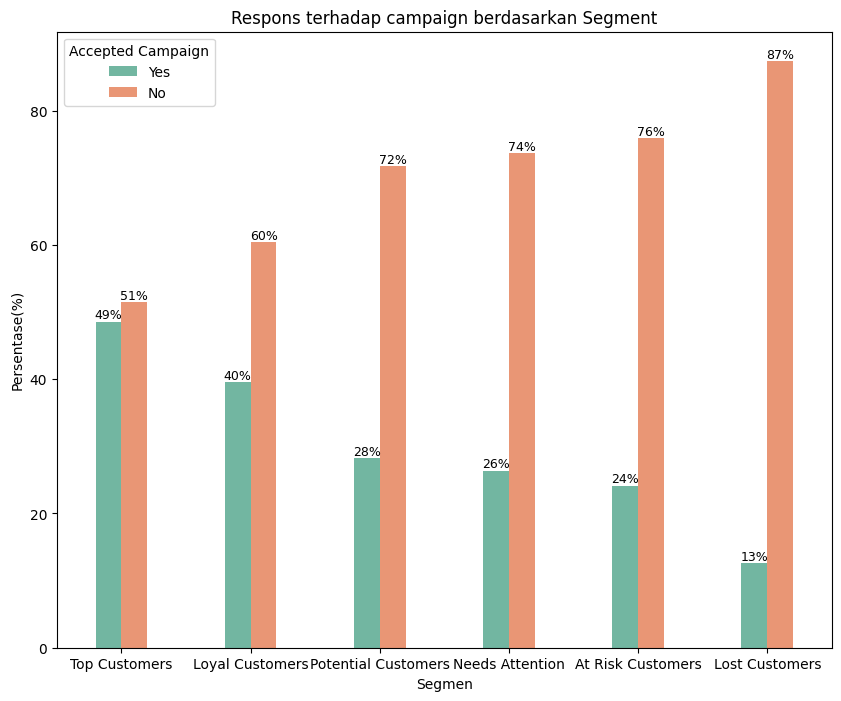

In [110]:
hue_order = ['Yes', 'No']

plt.figure(figsize=(10, 8))
bar_plot = sns.barplot(
    data=accept_campaign,
    x='Segment',
    y='Percentage',
    hue='AcceptedCampaign',
    hue_order=hue_order,  
    errorbar=None,
    palette='Set2',
    width=0.4,
    order= ['Top Customers', 'Loyal Customers', 'Potential Customers', 'Needs Attention', 'At Risk Customers', 'Lost Customers']
)

# Tambahkan label persentase di tiap batang
for i in bar_plot.containers:
    bar_plot.bar_label(i, fmt='%.0f%%', size=9)

plt.title('Respons terhadap campaign berdasarkan Segment', size=12)
plt.xlabel('Segmen', size=10)
plt.ylabel('Persentase(%)', size=10)
plt.legend(title='Accepted Campaign', loc='upper left') 
plt.show()

Respons tiap Segment terhadap Campaign:

| Segment                 | Respons Yes (%) | Insight                                              |
| ----------------------- | --------------- | ---------------------------------------------------  |
| **Top Customers**       | 49%            | Paling responsif, target utama campaign               |
| **Loyal Customers**     | 40%            | Respons masih baik                                    |
| **Potential Customers** | 28%            | Respons kurang baik                                   |
| **Needs Attention**     | 26%            | Respons rendah                                        |
| **At Risk Customers**   | 24%            | Respons rendah                                        |
| **At Risk**             | 13%            | Respons paling rendah                                 |

Top Customers merupakan segment customer yang mapan secara finansial lebih sering menerima campaign dibanding yang lainnya.

### Apakah ada hubungan antara `Segment` dan `AcceptedCampaign`?

Hipotesis:
- H0 = Ada hubungan antara Segment dan AcceptedCampaign
- H1 = Ada hubungan antara Segment dan AcceptedCampaign

In [111]:
chisquare_test = pd.crosstab(df_clean['Segment'], df_clean['AcceptedCampaign'])
chisquare_test.head()

AcceptedCampaign,No,Yes
Segment,,
At Risk Customers,308,98
Lost Customers,457,66
Loyal Customers,148,97
Needs Attention,374,134
Potential Customers,198,78


In [112]:
stat, pval, dof, ef = chi2_contingency(chisquare_test)

if pval < 0.05:
    print('Tolak H0, Ada hubungan antara Segment dan AcceptCampaign')
else:
    print('Gagal tolak H0, Tidak ada hubungan antara Segment dan AcceptCampaign')

Tolak H0, Ada hubungan antara Segment dan AcceptCampaign


Dari hasil uji statistik:
- Ada hubungan antara variabel `Segment` terhadap variabel `AcceptCampaign` (paling tidak sekali menerima Campaign)
- Top Customers paling banyak menunjukkan response positif terhadap campaign.

# **Efektivitas Promosi Diskon/Deals berdasarkan Respons pelanggan**

In [113]:
df_clean.head()

,ID,Age,AgeCategory,Education,MaritalStatus,Income,IncomeCategory,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalSpending,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalTransactions,R_Score,F_Score,M_Score,RFM_Score,Segment,Segment_Spending
0,5524,68,Elderly/Lansia (60+),Bachelor/Diploma,Single,58138.0,50K-70K,0,0,58,635,88,546,172,88,88,1617,0,0,0,0,0,1,Yes,3,8,10,4,25,3,5,5,13,Loyal Customers,Top Spender
1,2174,71,Elderly/Lansia (60+),Bachelor/Diploma,Single with Child,46344.0,<50K,1,1,38,11,1,6,2,1,6,27,0,0,0,0,0,0,No,2,1,1,2,6,4,1,1,6,Lost Customers,Non Top Spender
2,4141,60,Elderly/Lansia (60+),Bachelor/Diploma,Together,71613.0,>70K,0,0,26,426,49,127,111,21,42,776,0,0,0,0,0,0,No,1,8,2,10,21,4,4,4,12,Top Customers,Non Top Spender
3,6182,41,Adult/Dewasa (29-44),Bachelor/Diploma,Together,26646.0,<50K,1,0,26,11,4,20,10,3,5,53,0,0,0,0,0,0,No,2,2,0,4,8,4,2,1,7,Lost Customers,Non Top Spender
4,5324,44,Adult/Dewasa (29-44),PhD,Married,58293.0,50K-70K,1,0,94,173,43,118,46,27,15,422,0,0,0,0,0,0,No,5,5,3,6,19,1,4,3,8,At Risk Customers,Non Top Spender


In [114]:
discount_response = df_clean[['Segment', 'NumDealsPurchases']]

discount_response

,Segment,NumDealsPurchases
0,Loyal Customers,3
1,Lost Customers,2
2,Top Customers,1
3,Lost Customers,2
4,At Risk Customers,5
...,...,...
2235,Loyal Customers,2
2236,Loyal Customers,7
2237,At Risk Customers,1
2238,Top Customers,2


In [115]:
# Hitung pembelian dengan diskon per segmen
discount_summary = (
    discount_response.groupby('Segment', as_index=False)
    .agg({'NumDealsPurchases': 'sum'})
    .sort_values(by='NumDealsPurchases', ascending=False)
)

# Tampilkan hasil
discount_summary

,Segment,NumDealsPurchases
3,Needs Attention,1301
0,At Risk Customers,986
2,Loyal Customers,810
1,Lost Customers,728
5,Top Customers,698
4,Potential Customers,678


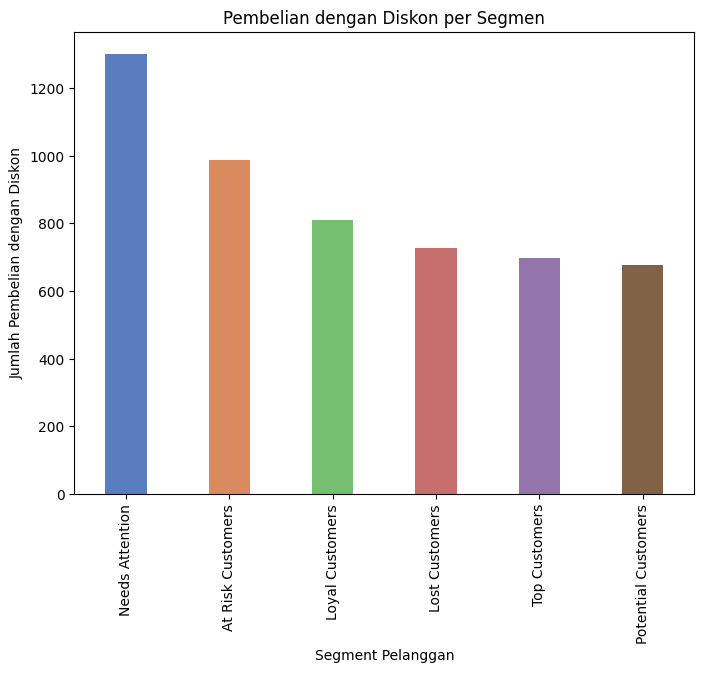

In [116]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=discount_summary,
    x='Segment',
    y='NumDealsPurchases',
    order=discount_summary['Segment'], 
    estimator='sum',
    width = 0.4, 
    palette = 'muted')
plt.title('Pembelian dengan Diskon per Segmen')
plt.xlabel('Segment Pelanggan')
plt.ylabel('Jumlah Pembelian dengan Diskon')
plt.xticks(rotation=90)
plt.show()

- Segmen Needs Attention dan At Risk Customers adalah segmen yang paling sering melakukan pembelian saat ada diskon, menandakan bahwa mereka responsif terhadap diskon.
- Segmen Loyal, Lost, Potential dan Top cukup responsif terhadap promo discount.
- Segmen Top perlu dikurangi ketergantungannya pada diskon.

# **Insight dan Rekomendasi Action Strategis**

## **Goals**

- Menentukan segmentasi pelanggan dengan analisis RFM untuk memahami perilaku, nilai dan strategi perlakuan pelanggan.
- Mengoptimalkan strategi kampanye pemasaran sesuai respons tiap segmen terhadap campaign.
- Mengoptimalkan strategi promosi diskon sesuai tingkat respons pelanggan terhadap promo harga.
- Mengidentifikasi karakteristik pelanggan bernilai tinggi berdasarkan total spending sebagai acuan akuisisi pelanggan baru.

## **Insight**

### **1. Segmentasi pelanggan berdasarkan RFM**

📊 **Insight RFM Segmentation** :

- Terdapat 6 segmen pelanggan berdasarkan perilaku RFM:

| **Segment**             | **Kriteria RFM dan Perilaku Pelanggan**                                                                                                                                                                                |
| ----------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Top Customers**       | **R ≥ 4, F ≥ 4, M ≥ 4.** Pelanggan dengan nilai tertinggi di semua aspek. Sangat aktif, sering bertransaksi, dan memiliki nilai belanja tinggi dan stabil.                             |
| **Loyal Customers**     | **R ≥ 3, F ≥ 4, M ≥ 3.** Pelanggan yang rutin bertransaksi. Nilai belanja stabil dan frekuensi tinggi, meskipun tidak seintens Top Customers.                                               |
| **Potential Customers** | **R ≥ 3, F ≥ 3, M ≥ 2.** Pelanggan yang cukup aktif dan memiliki potensi untuk menjadi loyal. Transaksi cukup sering dengan nilai menengah.                                           |
| **Needs Attention**     | **R ≥ 2, F ≥ 2, M ≥ 2.** Aktivitas mulai menurun. Transaksi tidak terlalu sering dan nilai belanja sedang.                                                                                  |
| **At Risk Customers**   | **R ≤ 2 dan (F ≥ 2 atau M ≥ 2).** Aktivitas menurun tajam, sudah cukup lama tidak bertransaksi meski pernah aktif, risiko churn.                                             |
| **Lost Customers**      | **R, F, dan M rendah (umumnya ≤ 2).** Tidak aktif, jarang atau hampir tidak bertransaksi.                                                                                               |

Persentase pelanggan berdasarkan segmentasi RFM:
* **Loyal Customers (12,4%)** – Segmen terbesar; pelanggan aktif dan stabil.
* **Potential Customers (11%)** – Potensi tinggi jadi loyal.
* **Top Customers (12,3%)** – Paling bernilai.
* **Needs Attention (22,7%)** – Aktivitas belanja menurun.
* **At Risk Customers (18,2%)** – Mulai tidak aktif.
* **Lost Customers (23,4%)** – Tidak aktif.

Persentase Top Spenders:
- Top Spenders berkontribusi sebesar ~70% dari total revenue, mereka tidak hanya dari segment Top Customers (29,2%) saja, tetapi juga dari segmen Loyal (16,5%), Potential (12,5%), Needs Attention (23%) dan At Risk Customers (18,6%). 
- Oleh sebab itu, perlu untuk merancang strategi perlakuan pada tiap segmen.

### **2. Efektivitas Pemasaran berdasarkan respons terhadap Marketing Campaign dan respons terhadap Promosi Discount**

**Insight:**
1. Campaign

| Segment                 | Respons Yes (%) | Insight                                              |
| ----------------------- | --------------- | ---------------------------------------------------  |
| **Top Customers**       | 49%            | Paling responsif, target utama campaign               |
| **Loyal Customers**     | 40%            | Respons masih baik                                    |
| **Potential Customers** | 28%            | Respons kurang baik                                   |
| **Needs Attention**     | 26%            | Respons rendah                                        |
| **At Risk Customers**   | 24%            | Respons rendah                                        |
| **At Risk**             | 13%            | Respons paling rendah                                 |

2. Promosi Deals/Promo
- Segmen Needs Attention dan At Risk Customers adalah segmen yang paling sering melakukan pembelian saat ada diskon, menandakan bahwa mereka responsif terhadap promo harga dan cenderung termotivasi oleh potongan harga.
- Segmen Loyal, Lost dan Potential, Top cukup responsif terhadap promo discount.
- Segmen Top harus dikurangi ketergantungannya pada diskon karena mereka yang paling bernilai.

Berikut table respons pelanggan terhadap campaign dan diskon pada tiap segmen:

| **Segment**             | **Ciri Perilaku Pelanggan (RFM)**                                          | **Respons terhadap Campaign**                                                             | **Respons terhadap Diskon/Deals**                                                                   |
| ----------------------- | -------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------- |
| **Top Customers**       | Pelanggan dengan nilai tertinggi di semua aspek. Sangat aktif, sering transaksi, nilai belanja tinggi, dan stabil.          | **Paling Tinggi (~49%)**. Paling responsif, target utama campaign.                         | **Sedang**. perlu untuk dikurangi ketergantungannya pada diskon. |
| **Loyal Customers**     | Rutin berbelanja. Nilai belanja stabil dan frekuensi tinggi, meskipun tidak seintens Top Customers. | **Sedang (~40%)**. Respons baik terhadap campaign.                                         | **Sedang**. responsif terhadap diskon.                                       |
| **Potential Customers** | Cukup aktif dan memiliki potensi untuk menjadi loyal. Transaksi cukup sering dengan nilai menengah.  | **Rendah (~28%)**. Respons kurang baik.                                                     | **Sedang**. responsif terhadap diskon.                                                       |
| **Needs Attention**     | Aktivitas mulai menurun, pembelian jarang, nilai transaksi mulai turun.         | **Rendah (~26%)**. Respons kurang baik.                                                         | **Paling Tinggi**. sangat responsif terhadap  diskon.                                                  |
| **At Risk Customers**   | Aktivitas menurun tajam, sudah cukup lama tidak bertransaksi meski pernah aktif, risiko churn.                       | **Rendah (~24%)**. Respons kurang baik.                                                         | **Cukup Tinggi**. responsif terhadap diskon.                                                      |
| **Lost Customers**      | Tidak aktif, jarang atau hampir tidak bertransaksi.                    | **Paling rendah (~13%)**. Respons paling buruk.                                            | **Sedang**. cukup responsif terhadap diskon.                                    |


### **3. Karakteristik pelanggan yang berkontribusi paling besar terhadap revenue berdasarkan total spending**

**Insight:**
- Customer yang memiliki total spending yang terbesar adalah customer dengan Income >70K dan 50K-70K, berstatus Married dan Together dan tidak memiliki anak kecil.
- Customer yang mapan secara finansial, matang secara usia dan sudah berpasangan. Mereka punya disposable Income yang besar karena tidak ada tanggungan anak.

## **Rekomendasi Action Strategis**:

Berdasarkan hasil analisis data pelanggan dan segmentasi RFM, diperoleh beberapa temuan utama yang dapat menjadi rekomendasi strategi pemasaran perusahaan:

1. Strategi Pemasaran Berdasarkan RFM, Respons Campaign, dan Respons terhadap Diskon:

| **Segment**             | **Ciri Perilaku Pelanggan (RFM)**                                          | **Strategi Perlakuan**                                                             | **Strategi Campaign**                                                                                 | **Strategi Promosi Diskon/Deals**                                                                                 |
| ----------------------- | -------------------------------------------------------------------------- | ---------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------- |
| **Top Customers**       | Sangat aktif, sering transaksi, nilai belanja tinggi, dan stabil.          | Pertahankan hubungan dan berikan penghargaan eksklusif (*VIP treatment*).          | Kampanye apresiasi dan ekslusif seperti *VIP program* atau *exclusive program*, *member rewards*, atau *early access*. | Minimalkan diskon; fokus pada *value-added offers* seperti bundling eksklusif atau hadiah. |
| **Loyal Customers**     | Rutin berbelanja. Nilai belanja stabil dan frekuensi tinggi, meskipun tidak seintens Top Customers. | Dorong agar naik menjadi *Top Customers* melalui peningkatan engagement.           | Kampanye loyalitas seperti *referral program*, *personalized offer*, atau *loyal customer rewards*.   | Berikan *bundle deals*, *seasonal promo* atau *loyalty coupon*.                        |
| **Potential Customers** | Cukup aktif dan memiliki potensi untuk menjadi loyal. Transaksi cukup sering dengan nilai menengah.  | Bangun hubungan jangka panjang dan dorong pembelian berulang.                      | Kampanye *welcome back* atau *educational content* untuk memperkuat koneksi dengan brand.             | Tawarkan *introductory discount* atau *limited-time offer* untuk mendorong pembelian.         |
| **Needs Attention**     | Aktivitas mulai menurun, pembelian jarang, nilai transaksi rendah.         | Re-engage pelanggan dengan pendekatan personal dan penawaran.              | Kampanye *reactivation campaign* atau *personalized reminder* berbasis histori pembelian terakhir.             | Tawarkan *deep discount* atau *flash sale* atau *targeted comeback offer*.              |
| **At Risk Customers**   | Aktivitas mulai menurun, pembelian jarang, nilai transaksi mulai turun. | Lakukan *win-back strategy*.    | Kampanye *win back* atau *feedback survey* untuk memahami alasan ketidakaktifan.             | Tawarkan *discount treshold atau comeback offer*                    |
| **Lost Customers**      | Tidak aktif, jarang atau hampir tidak bertransaksi.                                   | Evaluasi efektivitas upaya reaktivasi, jika masih rendah, alihkan fokus ke segmen lebih potensial. | Lakukan *final reactivation campaign* dengan pesan seperti “Kami merindukan Anda”. Jika respons masih rendah, alihkan ke segmen lain yang lebih potensial.                | *Final reactivation promo* |


Secara Ringkas:

| **Segment**             | **Perilaku Pelanggan**                 | **Strategi Perlakuan**          | **Strategi Campaign**                     | **Strategi Diskon & Promo**             |
| ----------------------- | -------------------------------------- | ------------------------------- | ----------------------------------------- | --------------------------------------- |
| **Top Customers**       | Sangat aktif, belanja tinggi & stabil. | Pertahankan & beri penghargaan. | Kampanye eksklusif & loyalitas.           | Minim diskon, fokus *value-added*.      |
| **Loyal Customers**     | Konsisten, potensial naik level.       | Dorong jadi top spender.        | Kampanye rekomendasi produk & loyalitas.  | Diskon loyalitas & *bundle deals*.      |
| **Potential Customers** | Potensi tumbuh, nilai menengah.        | Bangun kebiasaan belanja.       | Kampanye edukatif & *welcome back*.       | *Trial discount* & *limited offer*.     |
| **Needs Attention**     | Aktivitas menurun, jarang beli.        | *Re-engage* pelanggan.          | *Reactivation* & *personalized reminder*. | Promo terbatas & *flash sale*.          |
| **At Risk Customers**   | Risiko churn, nilai turun.             | Pulihkan hubungan.              | *Win-back* & *feedback campaign*.         | *Comeback offer* & *deep discount*.     |
| **Lost Customers**      | Hampir tidak aktif.                    | Evaluasi hasil reaktivasi.            | Pesan *final reminder*.                   | *Final promo*; stop jika tidak efektif. |

2. Karakteristik Pelanggan yang Spendingnya Tinggi
- Pelanggan dengan kontribusi spending terbesar umumnya memiliki pendapatan tinggi (di atas 70K), berstatus menikah atau hidup bersama, dan tidak memiliki anak kecil. 
- Mereka merupakan segmen yang mapan secara finansial dengan daya beli kuat. 
- Segmen ini layak menjadi acuan untuk akuisisi pelanggan baru dengan profil serupa.

**Rekomendasi Action:**
- Arahkan akuisisi pada calon pelanggan dengan profil mirip Top Spender (pendapatan tinggi, menikah atau berpasangan, tanpa anak kecil). 
- Tawarkan benefit eksklusif bagi pembelian pertama, dan tonjolkan nilai produk premium agar menarik minat segmen bernilai tinggi.


# 🎯 **Kesimpulan**:
- Karena strategi marketing belum efektif dan efisien serta belum segment, maka dilakukan analisis RFM untuk customer segmentation. 
- Berdasarkan analisis RFM, segmentasi pelanggan dibagi menjadi 6 segmen (Top, Loyal, Potential, Needs Attention, At Risk, Lost Customers) dengan perilaku berbelanja berbeda pada tiap segmennya.
- Pelanggan Top Spender terdistribusi pada tiap Segmen oleh karena itu perlu strategi perlakuan dan pemasaran untuk tiap segmennya agar pelanggan tidak pindah kategori atau bahkan sampai churn.
- Strategi perlakuan pada tiap segmen didasarkan pada analisis RFM, strategi pemasaran (campaign dan promosi deals) didasarkan pada respons pelanggan.
- Apabila pelanggan segmen Lost Customers masih menunjukkan respons penerimaan yang minim terhadap aktivitas pemasaran, maka perlu dipertimbangkan untuk alihkan budget pemasaran untuk segmen lain yang lebih potensial atau menargetkan akuisisi pelanggan baru.
- Karakteristik untuk akuisisi pelanggan baru berdasarkan Pelanggan Bernilai Tinggi (High-Value Customers) yaitu memiliki pendapatan tinggi (di atas 70K), berstatus menikah atau hidup bersama, dan tidak memiliki anak kecil. Mereka merupakan kelompok mapan secara finansial dan memiliki daya beli kuat, sehingga layak dijadikan acuan utama untuk akuisisi pelanggan baru dengan profil serupa.
